# Sparkling Dataset - Time Series Forecasting

## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.



## 1. Read the data as an appropriate Time Series data and plot the data.


In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from IPython.display import display
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings("ignore")


In [619]:
df=pd.read_csv('Sparkling.csv')
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [620]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [621]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [622]:
print("There are ",df.duplicated().sum()," duplicates in the dataset")


There are  0  duplicates in the dataset


In [623]:
df['Time_Stamp'] = pd.DataFrame(df,columns=['YearMonth'])
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'])
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='YearMonth', axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [624]:
df.dtypes

Sparkling    int64
dtype: object

In [625]:
df.tail()

Sparkling
Time_Stamp           
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [626]:
rcParams['figure.figsize'] = 20,8

df.Sparkling.plot()
plt.title('Sale of Sparkling wine', fontsize=14)
plt.ylabel('Units Sold')
plt.show();


## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [627]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [628]:
df.isnull().sum()

Sparkling    0
dtype: int64

### Monthly Sales

In [629]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years


Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

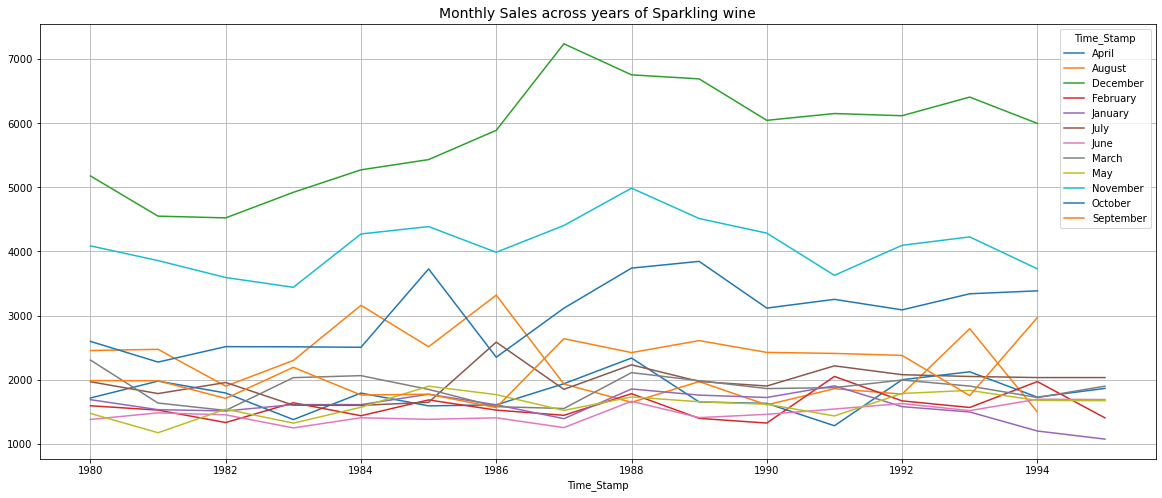

In [630]:
monthly_sales_across_years.plot()
plt.title('Monthly Sales across years of Sparkling wine', fontsize=14);

plt.grid();


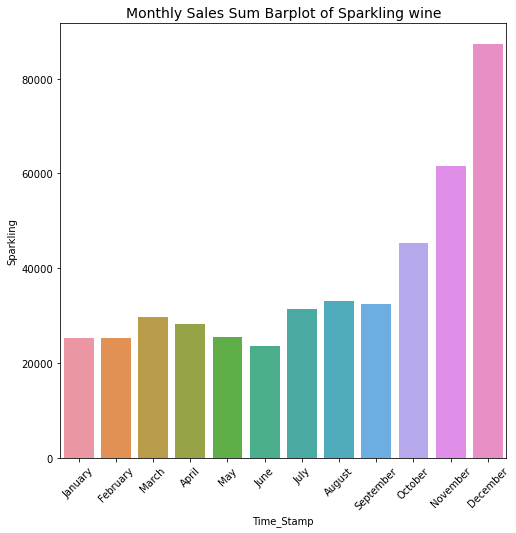

In [631]:
plt.figure(figsize=(8,8))
sns.barplot(df.index.month_name(),y='Sparkling',data=df,ci=False,estimator=sum);
plt.title('Monthly Sales Sum Barplot of Sparkling wine', fontsize=14);
plt.xticks(rotation=45);


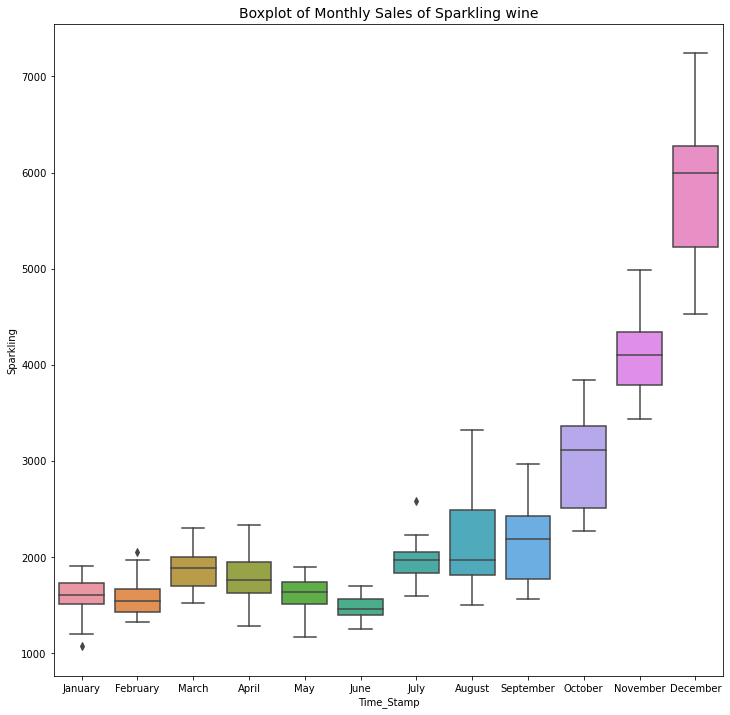

In [632]:
plt.figure(figsize=(12,12))
sns.boxplot(df.index.month_name(),y='Sparkling',data=df);
plt.title('Boxplot of Monthly Sales of Sparkling wine', fontsize=14);


In [633]:
fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Sparkling',ax=ax);
plt.title('Month Plot')
plt.xlabel('Month')

plt.grid();

### Quarterly Sales

In [634]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.quarter, index = df.index.year)
quarterly_sales_across_years


Time_Stamp            1            2            3            4
Time_Stamp                                                    
1980        1860.333333  1520.000000  2134.333333  3954.000000
1981        1562.000000  1542.000000  2078.000000  3560.333333
1982        1452.333333  1592.000000  1852.333333  3543.666667
1983        1759.000000  1313.333333  2029.666667  3624.666667
1984        1701.666667  1586.666667  2171.666667  4017.000000
1985        1766.333333  1621.333333  1976.000000  4516.333333
1986        1568.666667  1591.000000  2488.000000  4075.666667
1987        1459.666667  1567.666667  2138.333333  4920.333333
1988        1913.333333  1908.333333  2098.666667  5161.666667
1989        1711.000000  1570.000000  2182.333333  5017.666667
1990        1633.333333  1566.666667  1976.000000  4483.000000
1991        1941.666667  1417.000000  2159.666667  4344.000000
1992        1745.666667  1801.666667  2075.333333  4434.333333
1993        1652.000000  1822.333333  2197.333333  4658.666667
1994        1628.333333  1697.333333  2164.666667  4371.000000
1995        1456.333333  1740.000000  2031.000000          NaN

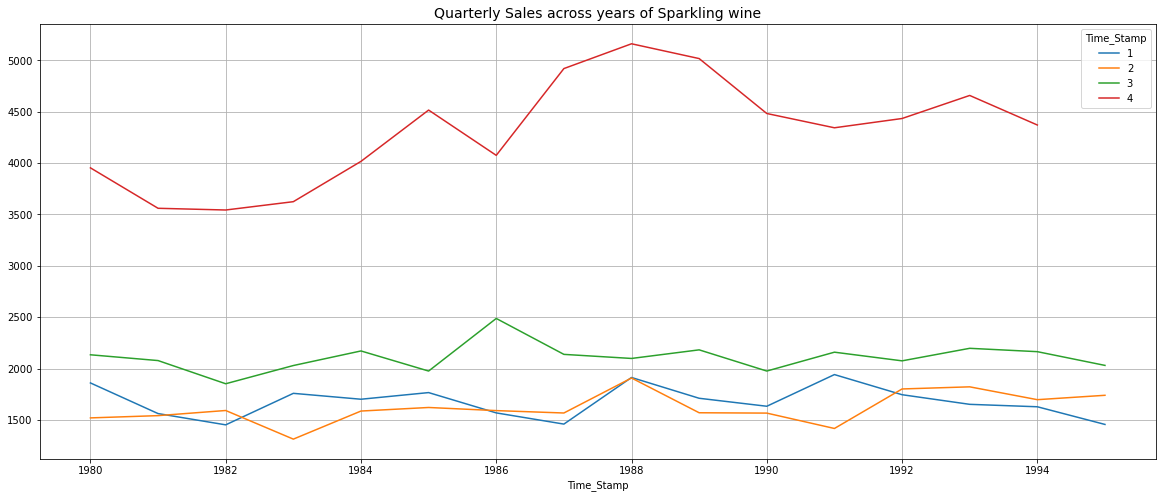

In [635]:
quarterly_sales_across_years.plot()
plt.title('Quarterly Sales across years of Sparkling wine', fontsize=14);

plt.grid();


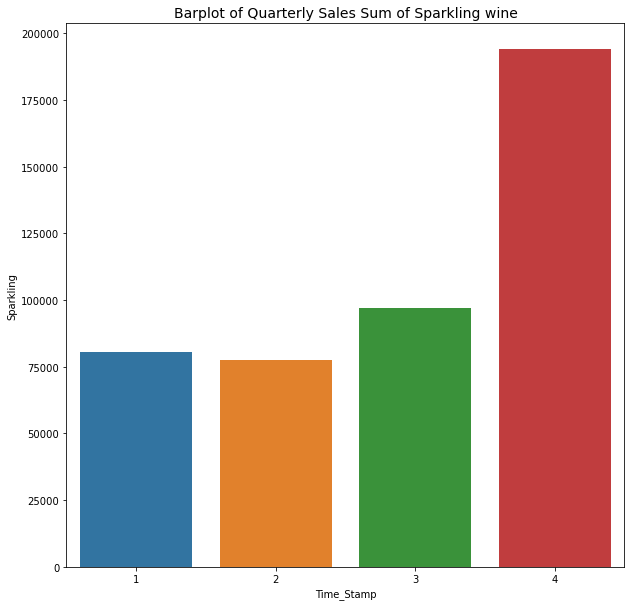

In [636]:
plt.figure(figsize=(10,10))
sns.barplot(df.index.quarter,y='Sparkling',data=df,ci=False,estimator=sum);
plt.title('Barplot of Quarterly Sales Sum of Sparkling wine', fontsize=14);


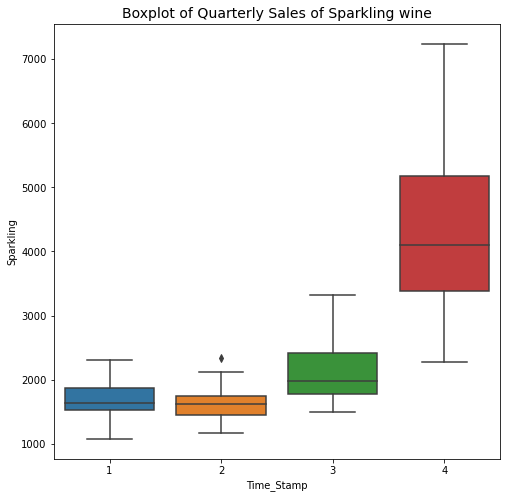

In [637]:
plt.figure(figsize=(8,8))

sns.boxplot(x = df.index.quarter,y = 'Sparkling',data=df);
plt.title('Boxplot of Quarterly Sales of Sparkling wine', fontsize=14);


### Yearly Sales

In [638]:
dfg=df.groupby(df.index.year).mean()
dfg

Sparkling
Time_Stamp             
1980        2367.166667
1981        2185.583333
1982        2110.083333
1983        2181.666667
1984        2369.250000
1985        2470.000000
1986        2430.833333
1987        2521.500000
1988        2770.500000
1989        2620.250000
1990        2414.750000
1991        2465.583333
1992        2514.250000
1993        2582.583333
1994        2465.333333
1995        1660.000000

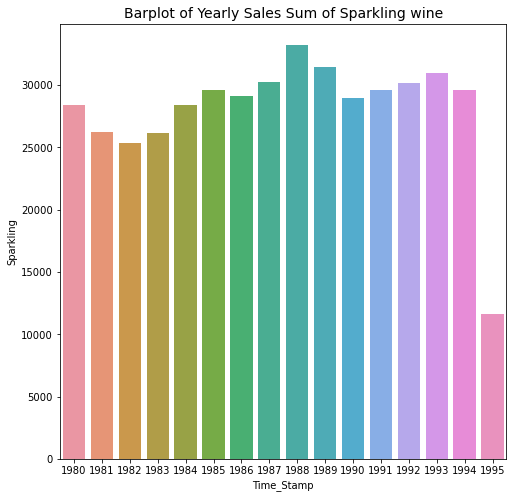

In [639]:
plt.figure(figsize=(8,8))
sns.barplot(df.index.year,y='Sparkling',data=df,ci=False,estimator=sum);
plt.title('Barplot of Yearly Sales Sum of Sparkling wine', fontsize=14);


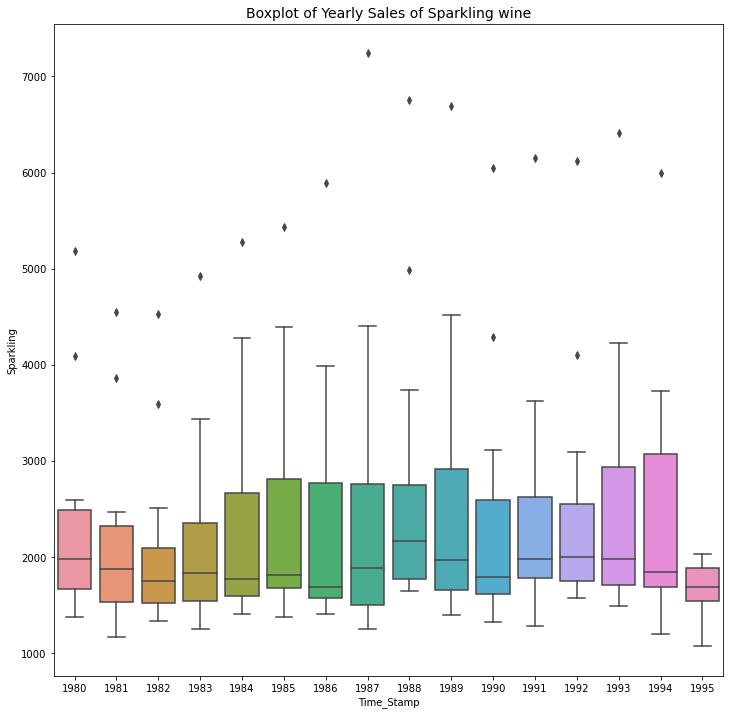

In [640]:
plt.figure(figsize=(12,12))

sns.boxplot(x = df.index.year,y = 'Sparkling',data=df);
plt.title('Boxplot of Yearly Sales of Sparkling wine', fontsize=14);


### Decomposition

                               Additive Decomposition of Sparkling wine


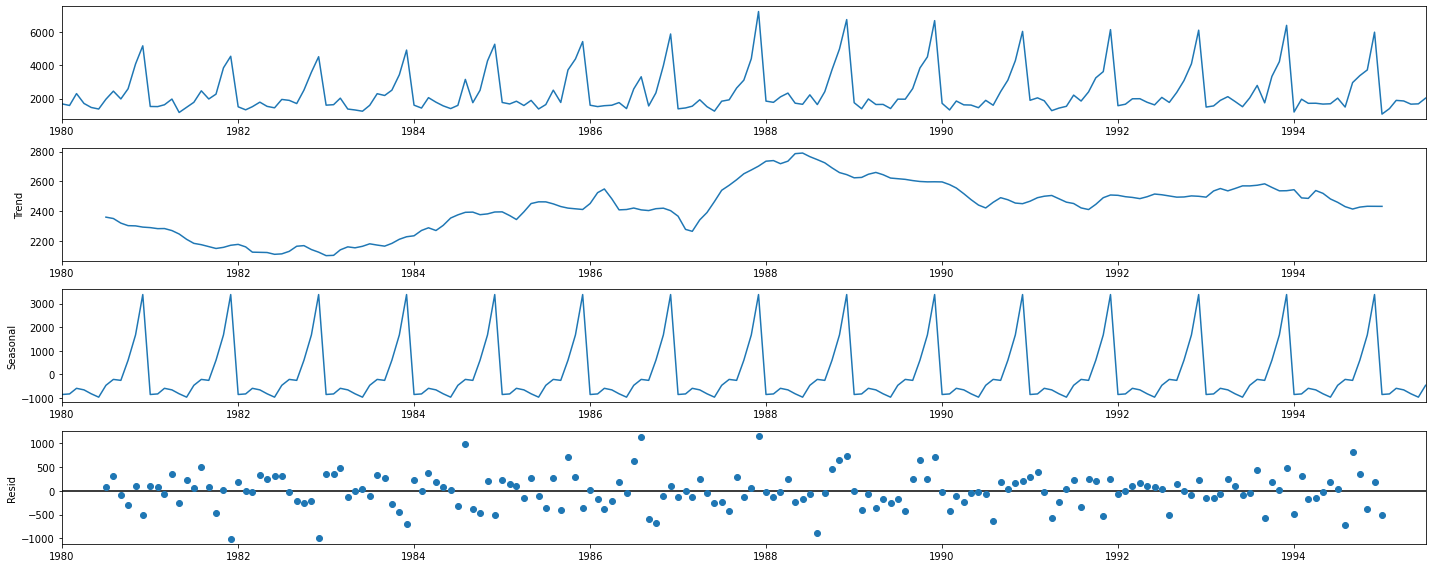

In [641]:
decomposition_add = seasonal_decompose(df,model='additive')
print("                               Additive Decomposition of Sparkling wine")
decomposition_add.plot();


In [642]:
trend_add = decomposition_add.trend
seasonality_add = decomposition_add.seasonal
residual_add = decomposition_add.resid

print('Additive Trend','\n',trend_add.head(12),'\n')
print('Additive Seasonality','\n',seasonality_add.head(12),'\n')
print('Additive Residual','\n',residual_add.head(12),'\n')

Additive Trend 
 Time_Stamp
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Additive Seasonality 
 Time_Stamp
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Additive Residual 
 Time_Stamp
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.86

                                Multiplicative Decomposition of Sparkling wine


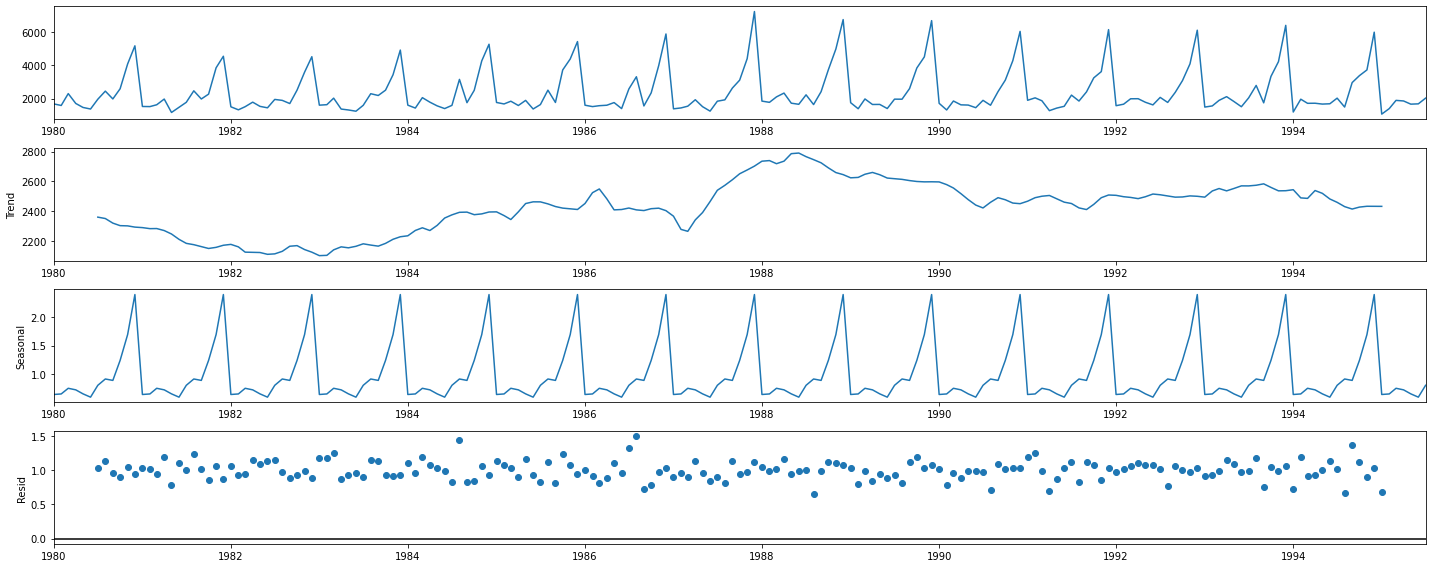

In [643]:
decomposition_mul = seasonal_decompose(df,model='multiplicative')
print("                                Multiplicative Decomposition of Sparkling wine")

decomposition_mul.plot();

In [644]:
trend_mul = decomposition_mul.trend
seasonality_mul = decomposition_mul.seasonal
residual_mul = decomposition_mul.resid

print('Multiplicative Trend','\n',trend_mul.head(12),'\n')
print('Multiplicative Seasonality','\n',seasonality_mul.head(12),'\n')
print('Multiplicative Residual','\n',residual_mul.head(12),'\n')

Multiplicative Trend 
 Time_Stamp
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Multiplicative Seasonality 
 Time_Stamp
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Multiplicative Residual 
 Time_Stamp
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-

## 3. Split the data into training and test. The test data should start in 1991.


In [645]:
train = df[df.index<'1991'] 
test  = df[df.index>='1991']

In [646]:
train.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [647]:
train.tail()

Sparkling
Time_Stamp           
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [648]:
test.head()

Sparkling
Time_Stamp           
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

In [649]:
test.tail()

Sparkling
Time_Stamp           
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [650]:
train.shape

(132, 1)

In [651]:
test.shape

(55, 1)

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.


### Simple Exponential Smoothing

In [652]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [653]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

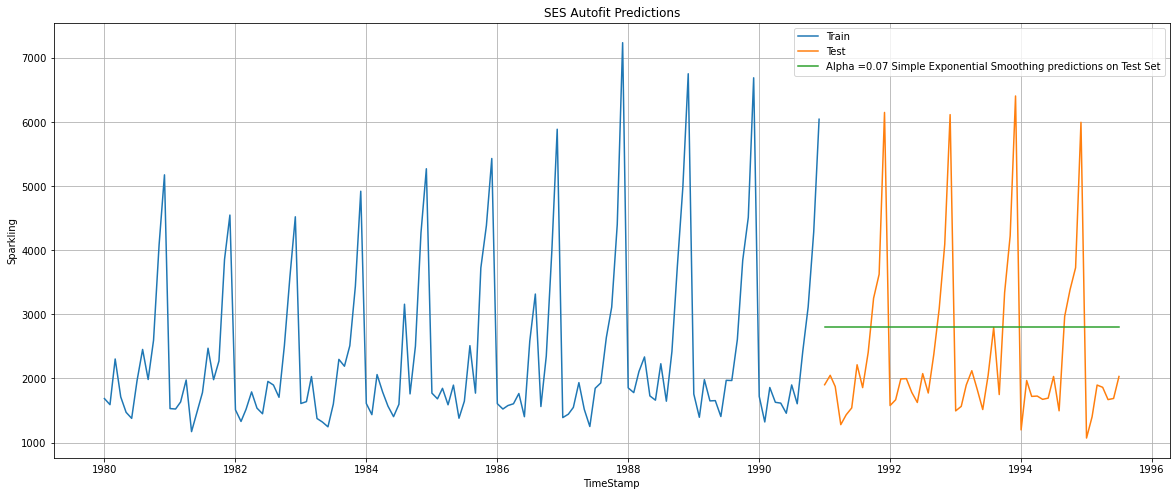

In [654]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.title('SES Autofit Predictions');

### Model Evaluation

In [655]:
rmse_modelSES_test=round(metrics.mean_squared_error(test.values,SES_predict.values,squared=False),2)
print('SES Autofit RMSE on Test data:',rmse_modelSES_test)


SES Autofit RMSE on Test data: 1338.01


In [656]:
resultsDf = pd.DataFrame({'Test RMSE': rmse_modelSES_test},index=['Alpha=0.07,SES'])
resultsDf

Test RMSE
Alpha=0.07,SES    1338.01

### Double Exponential Smoothing - Holt

In [657]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized=True,use_brute=True)

print(model_DES.params)

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [658]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

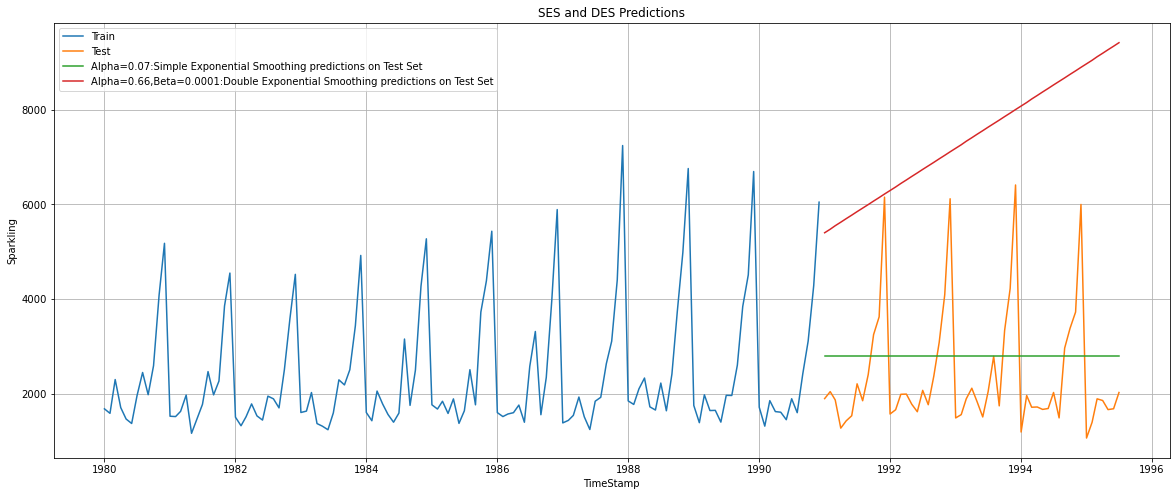

In [659]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.title('SES and DES Predictions');

### Model Evaluation

In [660]:
rmse_modelDES_test=round(metrics.mean_squared_error(test.values,DES_predict.values,squared=False),2)
print('DES Autofit RMSE on Test Data:',rmse_modelDES_test)

DES Autofit RMSE on Test Data: 5291.88


In [661]:
resultsDf_des = pd.DataFrame({'Test RMSE': [rmse_modelDES_test]}
                           ,index=['Alpha=0.66,Beta=0.0001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_des])
resultsDf

Test RMSE
Alpha=0.07,SES                1338.01
Alpha=0.66,Beta=0.0001:DES    5291.88

###  Triple Exponential Smoothing - ETS(A, A, A) - Holt Winter's linear method with additive errors 

In [662]:
# Initializing the Double Exponential Smoothing Model
model_TES_a = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES_a = model_TES_a.fit(optimized=True,use_brute=True)

print(model_TES_a.params)

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [663]:
# Forecasting using this model for the duration of the test set
TES_a_predict =  model_TES_a.forecast(len(test))
TES_a_predict

1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    1467.683944
1994-02-01    1181.806206
1994-03-01  

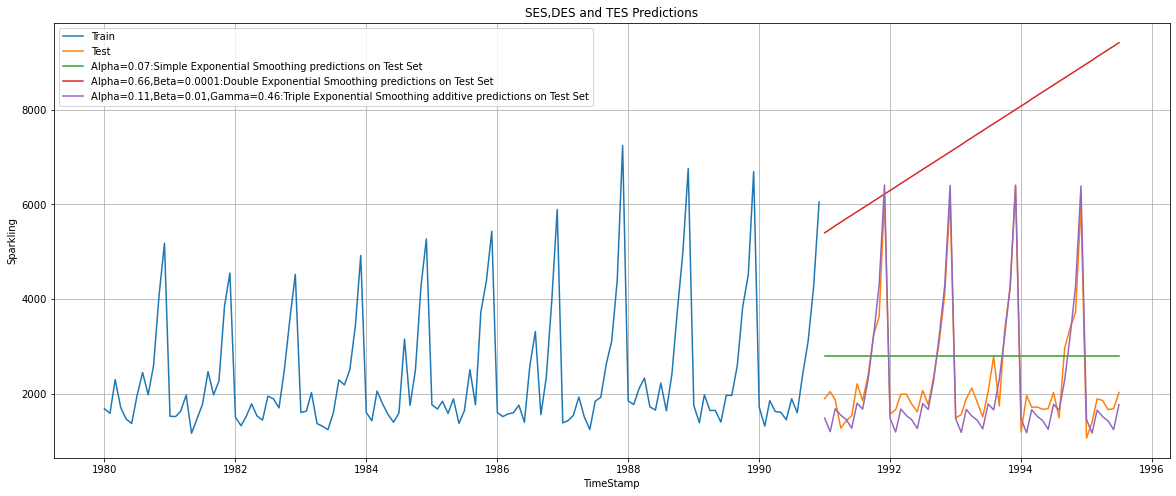

In [664]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label=('Alpha=0.07:Simple Exponential Smoothing predictions on Test Set'))
plt.plot(DES_predict, label=('Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set'))
plt.plot(TES_a_predict, label=('Alpha=0.11,Beta=0.01,Gamma=0.46:Triple Exponential Smoothing additive predictions on Test Set'))

plt.legend(loc='best')
plt.grid()
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.title('SES,DES and TES Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

### Model Evaluation

In [665]:
rmse_modelTESa_test=round(metrics.mean_squared_error(test.values,TES_a_predict.values,squared=False),2)
print('TES Additive Autofit RMSE on Test data:',rmse_modelTESa_test)

TES Additive Autofit RMSE on Test data: 378.95


In [666]:
resultsDf_tesA = pd.DataFrame({'Test RMSE': [rmse_modelTESa_test]}
                           ,index=['Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive'])

resultsDf = pd.concat([resultsDf, resultsDf_tesA])
resultsDf

Test RMSE
Alpha=0.07,SES                                  1338.01
Alpha=0.66,Beta=0.0001:DES                      5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive     378.95

### Triple Exponential Smoothing - ETS(A, A, M) - Holt Winter's linear method with multiplicative errors 

In [667]:
# Initializing the Double Exponential Smoothing Model
model_TES_m = ExponentialSmoothing(train,trend='additive',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_m = model_TES_m.fit(optimized=True,use_brute=True)

print(model_TES_m.params)

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [668]:
# Forecasting using this model for the duration of the test set
TES_m_predict =  model_TES_m.forecast(len(test))
TES_m_predict

1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
1991-06-01    1355.102435
1991-07-01    1854.197719
1991-08-01    1820.513188
1991-09-01    2276.971718
1991-10-01    3122.024202
1991-11-01    4128.528561
1991-12-01    5890.064588
1992-01-01    1538.233708
1992-02-01    1314.193684
1992-03-01    1707.937498
1992-04-01    1604.369388
1992-05-01    1493.650618
1992-06-01    1312.499576
1992-07-01    1795.750753
1992-08-01    1762.976871
1992-09-01    2204.819253
1992-10-01    3022.831861
1992-11-01    3997.009544
1992-12-01    5701.930382
1993-01-01    1488.969948
1993-02-01    1271.992443
1993-03-01    1652.945240
1993-04-01    1552.572843
1993-05-01    1445.298507
1993-06-01    1269.896716
1993-07-01    1737.303788
1993-08-01    1705.440555
1993-09-01    2132.666788
1993-10-01    2923.639519
1993-11-01    3865.490526
1993-12-01    5513.796176
1994-01-01    1439.706189
1994-02-01    1229.791202
1994-03-01  

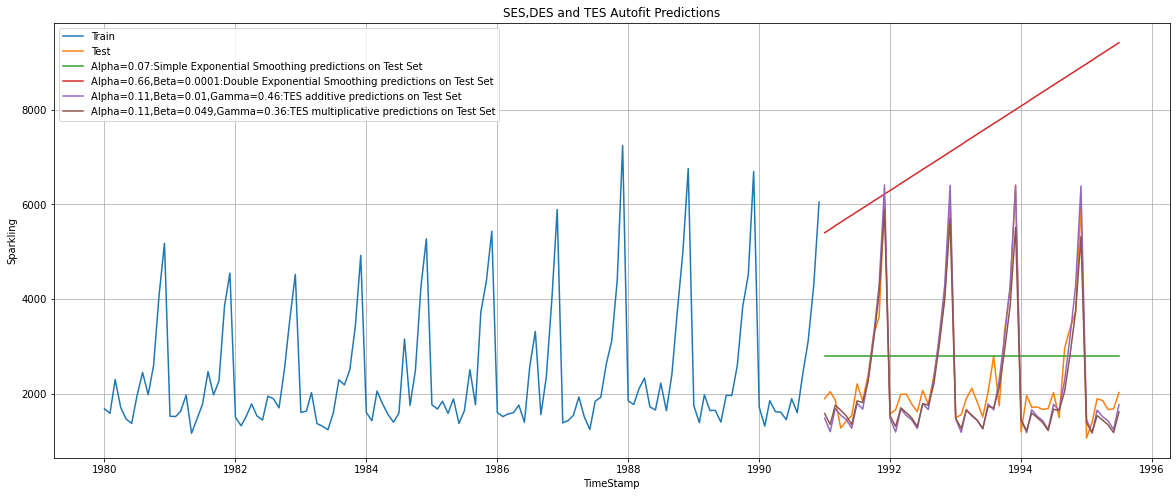

In [669]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_a_predict, label='Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive predictions on Test Set')
plt.plot(TES_m_predict, label='Alpha=0.11,Beta=0.049,Gamma=0.36:TES multiplicative predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.title('SES,DES and TES Autofit Predictions');

### Model Evaluation

In [670]:
rmse_modelTESm_test=round(metrics.mean_squared_error(test.values,TES_m_predict.values,squared=False),2)
print('TES multiplicative autofit RMSE on Test data :',rmse_modelTESm_test)

TES multiplicative autofit RMSE on Test data : 404.29


In [671]:
resultsDf_tesM = pd.DataFrame({'Test RMSE': [rmse_modelTESm_test]}
                           ,index=['Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_tesM])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29

## Iterative Method for Simple Exponential Smoothing

In [672]:
SES_train=train.copy()
SES_test = test.copy()
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

results_1 = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
results_1

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [673]:
for i in np.arange(0.1,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    #rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_modelSES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    results_1 = results_1.append({'Alpha Values':i,'Test RMSE':rmse_modelSES_test_i}, ignore_index=True)

In [674]:
results_1.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values    Test RMSE
0           0.1  1375.393335
1           0.2  1595.206839
2           0.3  1935.507132
3           0.4  2311.919615
4           0.5  2666.351413
5           0.6  2979.204388
6           0.7  3249.944092
7           0.8  3483.801006
8           0.9  3686.794285
9           1.0  3864.279352

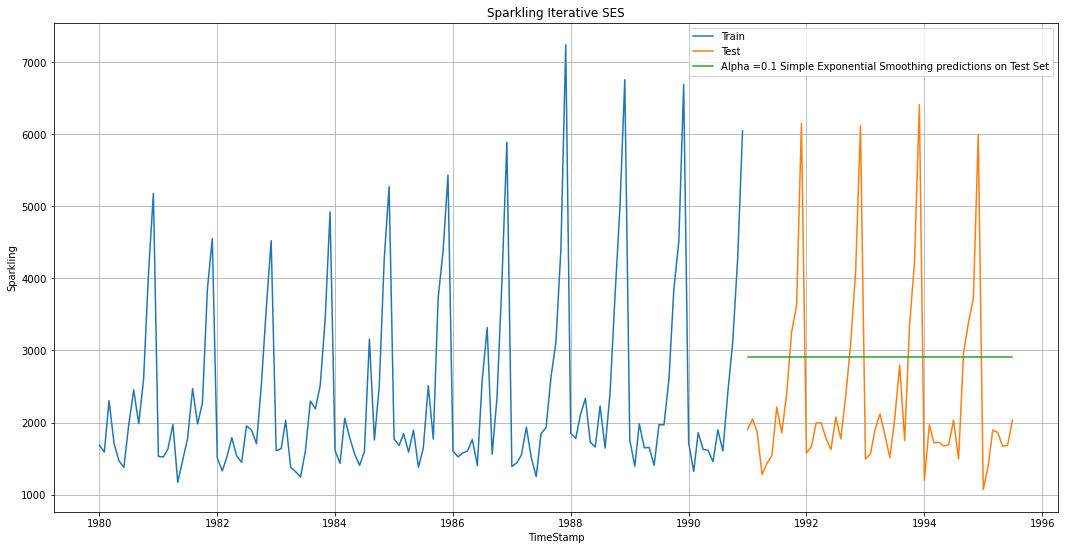

In [675]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

#plt.plot(SES_test['predict'], label='Test Set')

plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')


plt.title('Sparkling Iterative SES')

plt.legend(loc='best')
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.grid();

In [676]:
rmse_iter_SES=round(results_1.sort_values(by=['Test RMSE'],ascending=True).values[0][1],2)
print('Iterative SES RMSE on Test data :',rmse_iter_SES)

Iterative SES RMSE on Test data : 1375.39


In [677]:
resultsDf_SESiter = pd.DataFrame({'Test RMSE': [rmse_iter_SES]}
                           ,index=['Alpha=0.1 SES Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_SESiter])
resultsDf


Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39

## Iterative Method for Double Exponential Smoothing

In [678]:
DES_test = test.copy()
DES_train = train.copy()

model_DES = Holt(train,initialization_method='estimated')

results_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
results_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Test RMSE]
Index: []

In [679]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        #DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        #rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_modelDEs_test_i = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        results_2 = results_2.append({'Alpha Values':i,'Beta Values':j,'Test RMSE':rmse_modelDEs_test_i}, ignore_index=True)

In [680]:
DES_test

Sparkling  (predict, 0.1, 0.1)  (predict, 0.1, 0.2)  \
Time_Stamp                                                        
1991-01-01       1902          2847.662056          2732.198751   
1991-02-01       2049          2874.629043          2795.699790   
1991-03-01       1874          2901.596031          2859.200828   
1991-04-01       1279          2928.563018          2922.701866   
1991-05-01       1432          2955.530005          2986.202905   
1991-06-01       1540          2982.496993          3049.703943   
1991-07-01       2214          3009.463980          3113.204981   
1991-08-01       1857          3036.430967          3176.706020   
1991-09-01       2408          3063.397955          3240.207058   
1991-10-01       3252          3090.364942          3303.708096   
1991-11-01       3627          3117.331929          3367.209135   
1991-12-01       6153          3144.298917          3430.710173   
1992-01-01       1577          3171.265904          3494.211211   
1992-02-01       1667          3198.232891          3557.712250   
1992-03-01       1993          3225.199878          3621.213288   
1992-04-01       1997          3252.166866          3684.714326   
1992-05-01       1783          3279.133853          3748.215365   
1992-06-01       1625          3306.100840          3811.716403   
1992-07-01       2076          3333.067828          3875.217441   
1992-08-01       1773          3360.034815          3938.718480   
1992-09-01       2377          3387.001802          4002.219518   
1992-10-01       3088          3413.968790          4065.720556   
1992-11-01       4096          3440.935777          4129.221595   
1992-12-01       6119          3467.902764          4192.722633   
1993-01-01       1494          3494.869752          4256.223671   
1993-02-01       1564          3521.836739          4319.724710   
1993-03-01       1898          3548.803726          4383.225748   
1993-04-01       2121          3575.770713          4446.726786   
1993-05-01       1831          3602.737701          4510.227825   
1993-06-01       1515          3629.704688          4573.728863   
1993-07-01       2048          3656.671675          4637.229901   
1993-08-01       2795          3683.638663          4700.730940   
1993-09-01       1749          3710.605650          4764.231978   
1993-10-01       3339          3737.572637          4827.733016   
1993-11-01       4227          3764.539625          4891.234055   
1993-12-01       6410          3791.506612          4954.735093   
1994-01-01       1197          3818.473599          5018.236131   
1994-02-01       1968          3845.440587          5081.737169   
1994-03-01       1720          3872.407574          5145.238208   
1994-04-01       1725          3899.374561          5208.739246   
1994-05-01       1674          3926.341548          5272.240284   
1994-06-01       1693          3953.308536          5335.741323   
1994-07-01       2031          3980.275523          5399.242361   
1994-08-01       1495          4007.242510          5462.743399   
1994-09-01       2968          4034.209498          5526.244438   
1994-10-01       3385          4061.176485          5589.745476   
1994-11-01       3729          4088.143472          5653.246514   
1994-12-01       5999          4115.110460          5716.747553   
1995-01-01       1070          4142.077447          5780.248591   
1995-02-01       1402          4169.044434          5843.749629   
1995-03-01       1897          4196.011422          5907.250668   
1995-04-01       1862          4222.978409          5970.751706   
1995-05-01       1670          4249.945396          6034.252744   
1995-06-01       1688          4276.912383          6097.753783   
1995-07-01       2031          4303.879371          6161.254821   

            (predict, 0.1, 0.30000000000000004)  (predict, 0.1, 0.4)  \
Time_Stamp                                                             
1991-01-01                          2733.199316 

In [681]:
results_2.sort_values(by=['Test RMSE'],ascending=True).head(10)

Alpha Values  Beta Values    Test RMSE
0            0.1          0.1  1777.734773
1            0.1          0.2  2599.314701
10           0.2          0.1  3611.766690
2            0.1          0.3  4287.469279
20           0.3          0.1  5908.185555
3            0.1          0.4  6044.157399
11           0.2          0.2  6878.567126
4            0.1          0.5  7386.659388
30           0.4          0.1  8039.102035
5            0.1          0.6  8553.627687

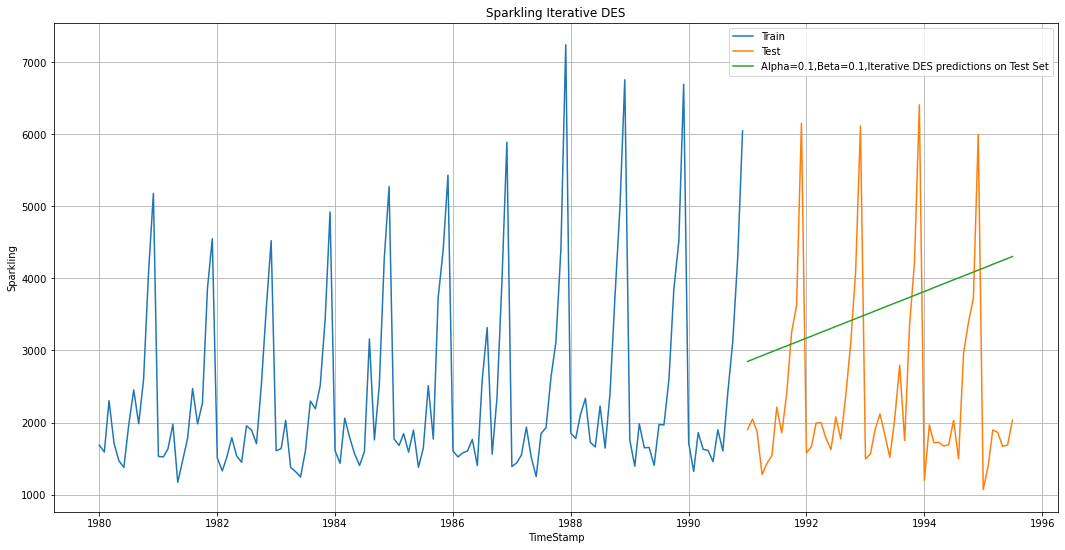

In [682]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(DES_test['predict',0.1,0.1], label='Alpha=0.1,Beta=0.1,Iterative DES predictions on Test Set')

plt.title('Sparkling Iterative DES')
plt.legend(loc='best')
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.grid();

In [683]:
rmse_iter_DES=round(results_2.sort_values(by=['Test RMSE'],ascending=True).values[0][2],2)
print('Iterative SES RMSE on Test data :',rmse_iter_DES)

Iterative SES RMSE on Test data : 1777.73


In [684]:
resultsDf_DESiter = pd.DataFrame({'Test RMSE': [rmse_iter_DES]}
                           ,index=['Alpha=0.1 , Beta=0.1,DES Iterative'])

resultsDf = pd.concat([resultsDf, resultsDf_DESiter])
resultsDf


Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73

### Iterative Method - Triple Exponential Smoothing - ETS(A, A, A)

In [685]:
TES_train_a = train.copy()
TES_test_a = test.copy()

In [686]:
model_TES_a = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
results_3 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
results_3

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [687]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_a.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_a['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_a['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            #rmse_model8_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_modelTES_test = metrics.mean_squared_error(TES_test_a['Sparkling'],TES_test_a['predict',i,j,k],squared=False)
            
            results_3 = results_3.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_modelTES_test}
                                                 , ignore_index=True)

In [688]:
results_3.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values   Test RMSE
30            0.1          0.4           0.1  342.934716
110           0.2          0.2           0.1  343.121437
156           0.2          0.6           0.7  348.792360
200           0.3          0.1           0.1  390.834811
20            0.1          0.3           0.1  391.304169

In [689]:
pd. set_option("display.max_columns", None) 

In [690]:
TES_test_a.head()

Sparkling  (predict, 0.1, 0.1, 0.1)  (predict, 0.1, 0.1, 0.2)  \
Time_Stamp                                                                  
1991-01-01       1902               1671.894991               1540.529588   
1991-02-01       2049               1535.938082               1354.094081   
1991-03-01       1874               1882.992874               1728.658127   
1991-04-01       1279               1798.243923               1638.281580   
1991-05-01       1432               1576.572747               1470.697707   

            (predict, 0.1, 0.1, 0.30000000000000004)  \
Time_Stamp                                             
1991-01-01                               1472.827405   
1991-02-01                               1236.723426   
1991-03-01                               1644.294990   
1991-04-01                               1535.922824   
1991-05-01                               1394.544409   

            (predict, 0.1, 0.1, 0.4)  (predict, 0.1, 0.1, 0.5)  \
Time_Stamp                                                       
1991-01-01               1444.947521               1440.100315   
1991-02-01               1163.127303               1118.381068   
1991-03-01               1605.772780               1593.658780   
1991-04-01               1469.062420               1424.230588   
1991-05-01               1347.223962               1324.218679   

            (predict, 0.1, 0.1, 0.6)  (predict, 0.1, 0.1, 0.7000000000000001)  \
Time_Stamp                                                                      
1991-01-01               1446.456719                              1456.102126   
1991-02-01               1091.681321                              1075.381082   
1991-03-01               1593.602194                              1595.700721   
1991-04-01               1393.229741                              1370.975056   
1991-05-01               1318.006765                              1319.843928   

            (predict, 0.1, 0.1, 0.8)  (predict, 0.1, 0.1, 0.9)  \
Time_Stamp                                                       
1991-01-01               1463.881598               1466.068864   
1991-02-01               1064.000128               1053.112171   
1991-03-01               1593.505655               1582.785206   
1991-04-01               1353.957836               1339.149607   
1991-05-01               1321.228814               1314.683129   

            (predict, 0.1, 0.1, 1.0)  (predict, 0.1, 0.2, 0.1)  \
Time_Stamp                                                       
1991-01-01               1459.164168               1566.754627   
1991-02-01               1038.299374               1424.172277   
1991-03-01               1560.187477               1766.615789   
1991-04-01               1323.199648               1678.789687   
1991-05-01               1293.946362               1455.381278   

            (predict, 0.1, 0.2, 0.2)  \
Time_Stamp                             
1991-01-01               1450.301036   
1991-02-01               1252.167561   
1991-03-01               1617.630365   
1991-04-01               1519.842554   
1991-05-01               1346.538997   

            (predict, 0.1, 0.2, 0.30000000000000004)  \
Time_Stamp                                             
1991-01-01                               1397.914821   
1991-02-01                               1147.916665   
1991-03-01                               1544.038674   
1991-04-01                               1425.335747   
1991-05-01                               1275.311606   

            (predict, 0.1, 0.2, 0.4)  (predict, 0.1, 0.2, 0.5)  \
Time_Stamp                                                       
1991-01-01               1383.562377               1388.924274   
1991-02-01               1087.243117               1052.711560   
1991-03-01               1517.377083               1514.994356   
1991-04-01               1368.531372               1332.394346   
1991-05-01               1236.138315               1

In [691]:
TES_test_a['predict',0.1,0.4,0.1]

Time_Stamp
1991-01-01    1613.405856
1991-02-01    1478.756641
1991-03-01    1833.235297
1991-04-01    1760.758167
1991-05-01    1555.702249
1991-06-01    1438.892417
1991-07-01    1955.506559
1991-08-01    2303.712292
1991-09-01    2219.410587
1991-10-01    3003.405363
1991-11-01    4203.435720
1991-12-01    5602.102281
1992-01-01    1650.758056
1992-02-01    1516.108841
1992-03-01    1870.587497
1992-04-01    1798.110367
1992-05-01    1593.054449
1992-06-01    1476.244617
1992-07-01    1992.858759
1992-08-01    2341.064493
1992-09-01    2256.762787
1992-10-01    3040.757563
1992-11-01    4240.787920
1992-12-01    5639.454481
1993-01-01    1688.110256
1993-02-01    1553.461041
1993-03-01    1907.939697
1993-04-01    1835.462567
1993-05-01    1630.406649
1993-06-01    1513.596817
1993-07-01    2030.210959
1993-08-01    2378.416693
1993-09-01    2294.114987
1993-10-01    3078.109763
1993-11-01    4278.140120
1993-12-01    5676.806681
1994-01-01    1725.462456
1994-02-01    1590.813242
1

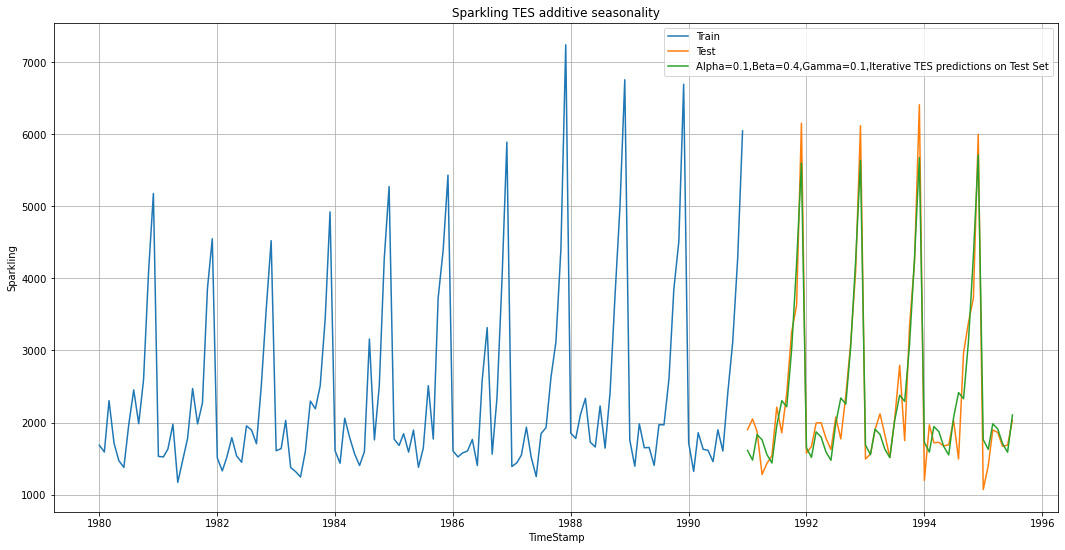

In [692]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_a['Sparkling'], label='Train')
plt.plot(TES_test_a['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_a['predict',0.1,0.4,0.1], label='Alpha=0.1,Beta=0.4,Gamma=0.1,Iterative TES predictions on Test Set')

plt.title('Sparkling TES additive seasonality')
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.legend(loc='best')
plt.grid();

In [693]:
rmse_iter_TES_a=round(results_3.sort_values(by=['Test RMSE']).values[0][3],2)
print('Iterative TES Additive RMSE on Test data :',rmse_iter_TES_a)

Iterative TES Additive RMSE on Test data : 342.93


In [694]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_iter_TES_a]}
                           ,index=['Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Additive Seas'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93

### Iterative Method - Triple Exponential Smoothing - ETS(A, A, M)

In [695]:
TES_train_m = train.copy()
TES_test_m = test.copy()

In [696]:
model_TES_m = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
results_4 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
results_4

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [697]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_m.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train_m['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test_m['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            #rmse_model8_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_modelTES_test = metrics.mean_squared_error(TES_test_m['Sparkling'],TES_test_m['predict',i,j,k],squared=False)
            
            results_4 = results_4.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Test RMSE':rmse_modelTES_test},ignore_index=True)
         

In [698]:
results_4.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values   Test RMSE
301           0.4          0.1           0.2  317.434302
211           0.3          0.2           0.2  329.037543
200           0.3          0.1           0.1  337.080969
110           0.2          0.2           0.1  340.186457
402           0.5          0.1           0.3  345.913415

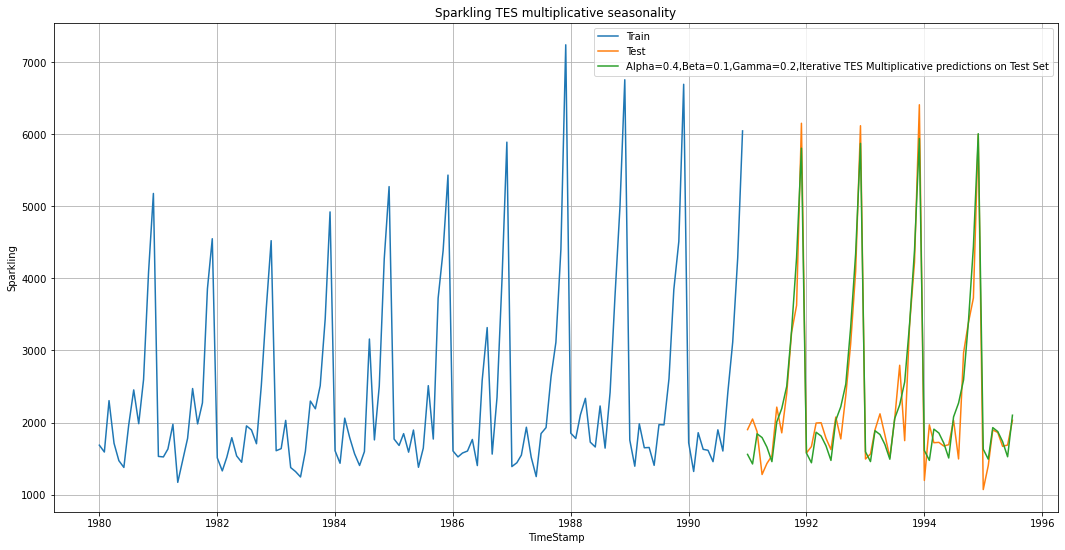

In [699]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_m['Sparkling'], label='Train')
plt.plot(TES_test_m['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test_m['predict',0.4,0.1,0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,Iterative TES Multiplicative predictions on Test Set')

plt.title('Sparkling TES multiplicative seasonality')
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.legend(loc='best')
plt.grid();

In [700]:
rmse_iter_TES_m=round(results_4.sort_values(by=['Test RMSE']).values[0][3],2)
print("The RMSE of iterative TES multiplicative is",rmse_iter_TES_m)

The RMSE of iterative TES multiplicative is 317.43


In [701]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_iter_TES_m]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Multiplicative Seas'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43

### Linear Regression Model

In [702]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [703]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [704]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
Time_Stamp                 
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
Time_Stamp                 
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
Time_Stamp                 
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
Time_Stamp                 
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

In [705]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])


LinearRegression()

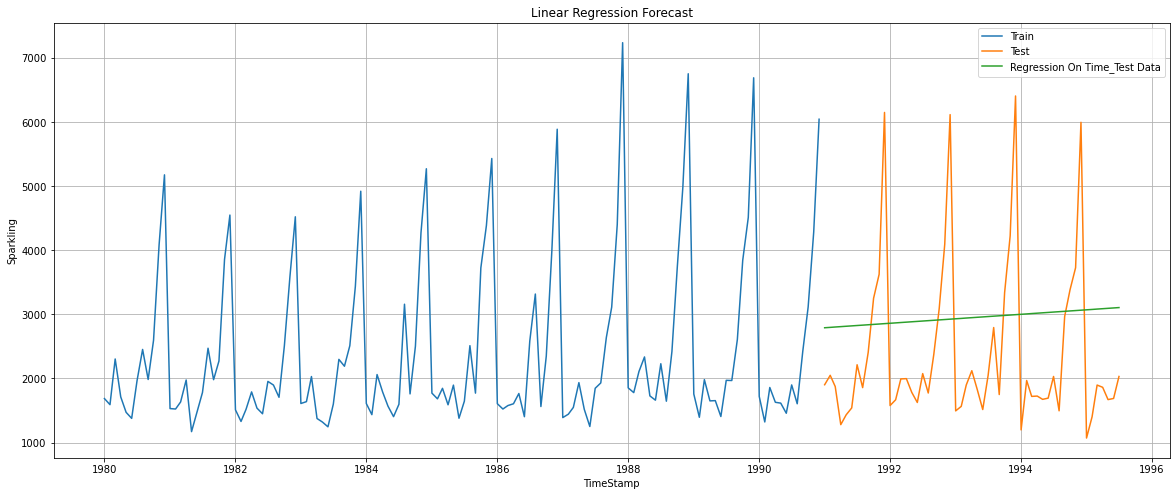

In [706]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title("Linear Regression Forecast")
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [707]:
from sklearn import metrics

rmse_model1_test = round(metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False),2)
print("The RMSE of Linear Regression forecast on the Test Data is " ,(rmse_model1_test))

The RMSE of Linear Regression forecast on the Test Data is  1389.14


In [708]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14

### Model -Naive Forecast Model:

In [709]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [710]:
train.tail()

Sparkling
Time_Stamp           
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [711]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [712]:
NaiveModel_test.head()

Sparkling  naive
Time_Stamp                  
1991-01-01       1902   6047
1991-02-01       2049   6047
1991-03-01       1874   6047
1991-04-01       1279   6047
1991-05-01       1432   6047

In [713]:
NaiveModel_test.tail()

Sparkling  naive
Time_Stamp                  
1995-03-01       1897   6047
1995-04-01       1862   6047
1995-05-01       1670   6047
1995-06-01       1688   6047
1995-07-01       2031   6047

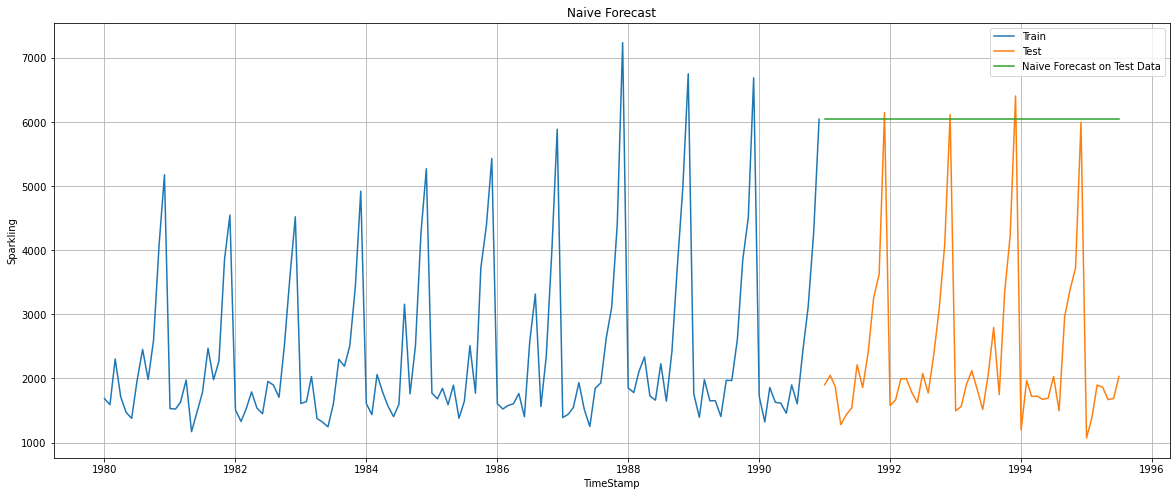

In [714]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [715]:
rmse_model2_test = round(metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False),2)
print("The RMSE for NaiveModel forecast on the Test Data" ,(rmse_model2_test))

The RMSE for NaiveModel forecast on the Test Data 3864.28


In [716]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28

### Simple Average Model

In [717]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [718]:
train['Sparkling'].mean()

2403.780303030303

In [719]:
SimpleAverage_test['mean_forecast'] = int(train['Sparkling'].mean())
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-01       1902           2403
1991-02-01       2049           2403
1991-03-01       1874           2403
1991-04-01       1279           2403
1991-05-01       1432           2403

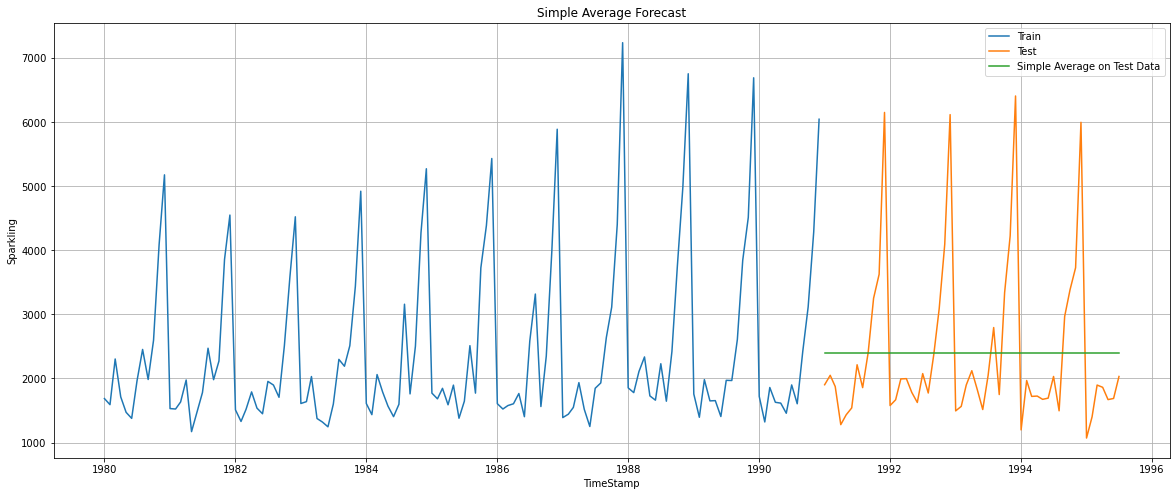

In [720]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [721]:
rmse_model3_test = round(metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False),2)
print("The RMSE for Simple Average forecast on the Test Data" ,(rmse_model3_test))

The RMSE for Simple Average forecast on the Test Data 1275.08


In [722]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08

### Moving Average Forecast Model

In [723]:
MovingAverage_train = train.copy()
MovingAverage_test = test.copy()

In [724]:
MovingAverage_train['Trailing_2'] = MovingAverage_train['Sparkling'].rolling(2).mean()
MovingAverage_train['Trailing_3'] = MovingAverage_train['Sparkling'].rolling(3).mean()
MovingAverage_train['Trailing_6'] = MovingAverage_train['Sparkling'].rolling(6).mean()
MovingAverage_train['Trailing_12'] = MovingAverage_train['Sparkling'].rolling(12).mean()

MovingAverage_train.tail()


Sparkling  Trailing_2   Trailing_3   Trailing_6  Trailing_12
Time_Stamp                                                              
1990-08-01       1605      1752.0  1653.666667  1677.166667  2563.750000
1990-09-01       2424      2014.5  1976.000000  1771.333333  2548.416667
1990-10-01       3116      2770.0  2381.666667  2019.333333  2487.666667
1990-11-01       4286      3701.0  3275.333333  2464.500000  2468.666667
1990-12-01       6047      5166.5  4483.000000  3229.500000  2414.750000

In [725]:
MovingAverage_train.head()


Sparkling  Trailing_2   Trailing_3  Trailing_6  Trailing_12
Time_Stamp                                                             
1980-01-01       1686         NaN          NaN         NaN          NaN
1980-02-01       1591      1638.5          NaN         NaN          NaN
1980-03-01       2304      1947.5  1860.333333         NaN          NaN
1980-04-01       1712      2008.0  1869.000000         NaN          NaN
1980-05-01       1471      1591.5  1829.000000         NaN          NaN

In [726]:
MovingAverage_train['Trailing_12']

Time_Stamp
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
                 ...     
1990-08-01    2563.750000
1990-09-01    2548.416667
1990-10-01    2487.666667
1990-11-01    2468.666667
1990-12-01    2414.750000
Name: Trailing_12, Length: 132, dtype: float64

In [727]:
MovingAverage_test['pred_Trailing_2'] = 5166                  ###5166.5
MovingAverage_test['pred_Trailing_3'] = 4483                  ##4483.000000
MovingAverage_test['pred_Trailing_6'] = 3229                   ##3229.500000
MovingAverage_test['pred_Trailing_12'] = 2414                  ##2414.750000



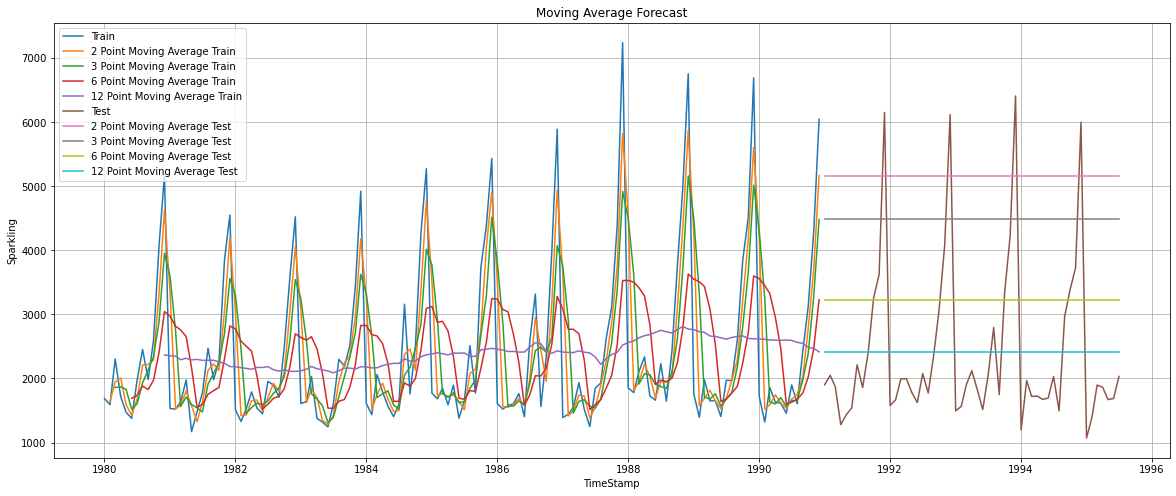

In [728]:
## Plotting on the whole data

plt.plot(MovingAverage_train['Sparkling'], label='Train')
plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Moving Average Train')
plt.plot(MovingAverage_train['Trailing_3'], label='3 Point Moving Average Train')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Moving Average Train')
plt.plot(MovingAverage_train['Trailing_12'],label = '12 Point Moving Average Train')
plt.plot(MovingAverage_test['Sparkling'], label='Test')

plt.plot(MovingAverage_test['pred_Trailing_2'], label='2 Point Moving Average Test')
plt.plot(MovingAverage_test['pred_Trailing_3'], label='3 Point Moving Average Test')
plt.plot(MovingAverage_test['pred_Trailing_6'],label = '6 Point Moving Average Test')
plt.plot(MovingAverage_test['pred_Trailing_12'],label = '12 Point Moving Average Test')

plt.legend(loc = 'best')
plt.title("Moving Average Forecast")
plt.ylabel('Sparkling')
plt.xlabel('TimeStamp')

plt.grid();

### Model Evaluation

In [729]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_modelMA_test_2 = round(metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['pred_Trailing_2'],squared=False),2)
print("The RMSE for 2 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_2))

## Test Data - RMSE --> 3 point Trailing MA

rmse_modelMA_test_3 = round(metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['pred_Trailing_3'],squared=False),2)
print("The RMSE for 3 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_3))

## Test Data - RMSE --> 6 point Trailing MA

rmse_modelMA_test_6 = round(metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['pred_Trailing_6'],squared=False),2)
print("The RMSE for 6 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_6))

## Test Data - RMSE --> 12 point Trailing MA

rmse_modelMA_test_12 = round(metrics.mean_squared_error(test['Sparkling'],MovingAverage_test['pred_Trailing_12'],squared=False),2)
print("The RMSE for 12 point Moving Average Model forecast on the Test Data is ",(rmse_modelMA_test_12))

The RMSE for 2 point Moving Average Model forecast on the Test Data is  3046.52
The RMSE for 3 point Moving Average Model forecast on the Test Data is  2443.0
The RMSE for 6 point Moving Average Model forecast on the Test Data is  1521.34
The RMSE for 12 point Moving Average Model forecast on the Test Data is  1275.16


In [730]:
resultsDf_ma = pd.DataFrame({'Test RMSE': [rmse_modelMA_test_2,rmse_modelMA_test_3
                                          ,rmse_modelMA_test_6,rmse_modelMA_test_12]}
                           ,index=['2pointTrailingMovingAverage','3pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_ma])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                           3046.52
3pointTrailingMovingAverage                           2443.00
6pointTrailingMovingAverage                           1521.34
12pointTrailingMovingAverage                          1275.16

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


In [731]:
def test_stationarity(timeseries):
    
   
    #Perform Augmented Dickey-Fuller test:
    print ('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [732]:
test_stationarity(train['Sparkling'])


Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



Augmented  Dickey-Fuller  Test: A  formal  test  to  check  whether  time  series  data  follows stationary process
 
The hypothesis for the statistical test is:

H0-Null Hypothesis: Time series is non-stationary

H1-Alternate Hypothesis: Time series is stationary

The p-value obtained by the test should be less than the significance level (say 0.05) to reject the Null hypothesis or it fails to reject the Null hypothesis.

p value obtained from the test is 0.6697 which is greater than 0.05 . Hence we fail to reject the Null Hypothesis and so we can say that data is non-stationary.

To convert the data into a stationary one, the difference of a Dataframe value with the value in the previous row is taken and remove missing values. The ADF Test is taken again on the modified train data.

In [733]:
test_stationarity(train.diff().dropna())

Results of Augmented Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



The p-value 2.280104e-12 obtained by the test is less than 0.05. Now the data has been converted into a stationary one.

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.


### ARIMA Train Model

In [734]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [735]:
# Creating an empty Dataframe with column names only
ARIMA_AIC1 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC1

Empty DataFrame
Columns: [param, AIC]
Index: []

In [736]:

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model1 = ARIMA(train['Sparkling'].diff().dropna(),order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model1.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC1 = ARIMA_AIC1.append({'param':param, 'AIC': ARIMA_model1.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2359.0493799749
ARIMA(0, 1, 1) - AIC:2257.658950296062
ARIMA(0, 1, 2) - AIC:2253.5550263205077
ARIMA(0, 1, 3) - AIC:2227.387719031849
ARIMA(1, 1, 0) - AIC:2328.4419743604276
ARIMA(1, 1, 1) - AIC:2256.778568846316
ARIMA(1, 1, 2) - AIC:2227.5373194002113
ARIMA(1, 1, 3) - AIC:2226.476258550863
ARIMA(2, 1, 0) - AIC:2308.14804019211
ARIMA(2, 1, 1) - AIC:2250.7568239630145
ARIMA(2, 1, 2) - AIC:2226.977905511778
ARIMA(2, 1, 3) - AIC:2252.9519428886833
ARIMA(3, 1, 0) - AIC:2285.470079708797
ARIMA(3, 1, 1) - AIC:2248.538423078817
ARIMA(3, 1, 2) - AIC:2245.1706445730265
ARIMA(3, 1, 3) - AIC:2237.4234637658765


In [737]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC1.sort_values(by='AIC',ascending=True)

param          AIC
7   (1, 1, 3)  2226.476259
10  (2, 1, 2)  2226.977906
3   (0, 1, 3)  2227.387719
6   (1, 1, 2)  2227.537319
15  (3, 1, 3)  2237.423464
14  (3, 1, 2)  2245.170645
13  (3, 1, 1)  2248.538423
9   (2, 1, 1)  2250.756824
11  (2, 1, 3)  2252.951943
2   (0, 1, 2)  2253.555026
5   (1, 1, 1)  2256.778569
1   (0, 1, 1)  2257.658950
12  (3, 1, 0)  2285.470080
8   (2, 1, 0)  2308.148040
4   (1, 1, 0)  2328.441974
0   (0, 1, 0)  2359.049380

In [738]:
auto_ARIMA1 = ARIMA(train['Sparkling'].diff().dropna(), order=(1,1,3))

results_auto_ARIMA1 = auto_ARIMA1.fit()

print(results_auto_ARIMA1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -1108.238
Date:                Sun, 05 Jun 2022   AIC                           2226.476
Time:                        21:48:47   BIC                           2240.814
Sample:                    02-01-1980   HQIC                          2232.302
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2073      0.283      0.733      0.463      -0.347       0.761
ma.L1         -1.6953      0.378     -4.479      0.000      -2.437      -0.953
ma.L2          0.4026      0.713      0.565      0.5

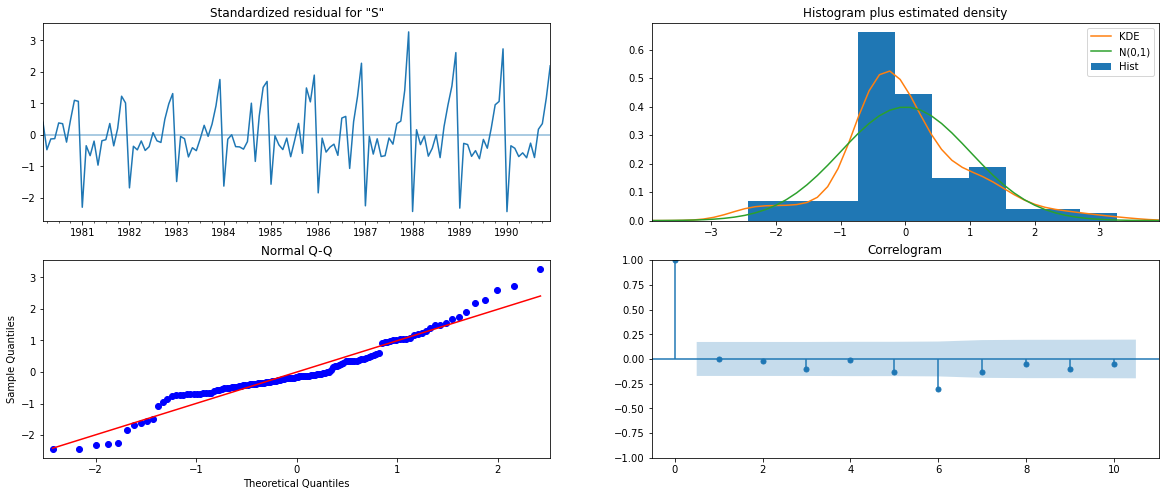

In [739]:
results_auto_ARIMA1.plot_diagnostics()
plt.show()


### ARIMA Test Model

In [740]:
predicted_auto_ARIMA1= results_auto_ARIMA1.forecast(steps=len(test))

In [741]:
rmse_autom_ARIMA = round(mean_squared_error(test['Sparkling'],predicted_auto_ARIMA1,squared=False),2)
print('RMSE of Automated ARIMA model on Test data is:',rmse_autom_ARIMA)

RMSE of Automated ARIMA model on Test data is: 2763.74


In [742]:
resultsDf_auto_ARIMA = pd.DataFrame({'Test RMSE': rmse_autom_ARIMA}
                           ,index=['ARIMA Automated(1,1,3)'])

resultsDf=pd.concat([resultsDf,resultsDf_auto_ARIMA])
resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                           3046.52
3pointTrailingMovingAverage                           2443.00
6pointTrailingMovingAverage                           1521.34
12pointTrailingMovingAverage                          1275.16
ARIMA Automated(1,1,3)                                2763.74

###  SARIMA Automated Train Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

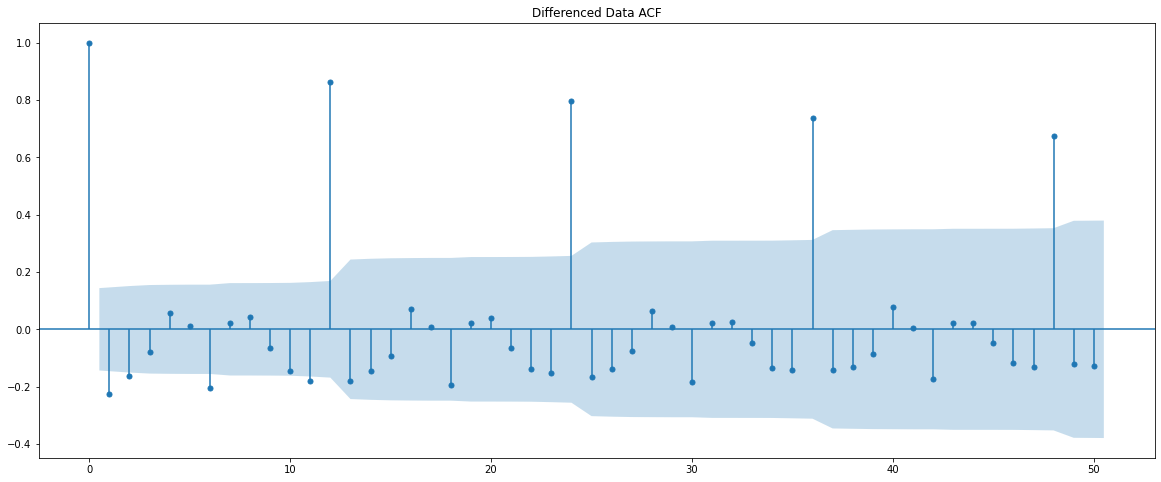

In [743]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data ACF')
plt.show()

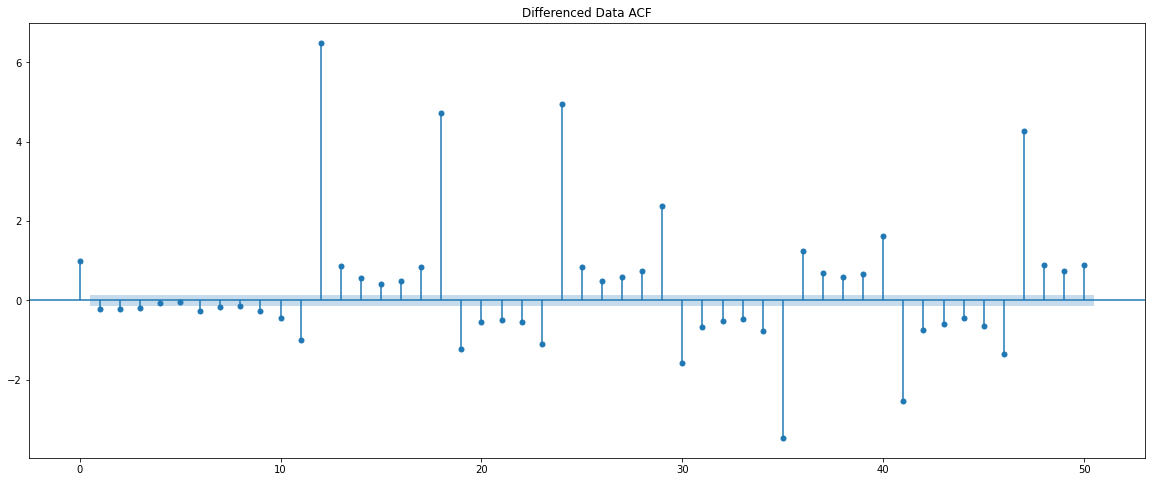

In [744]:
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data ACF')
plt.show()

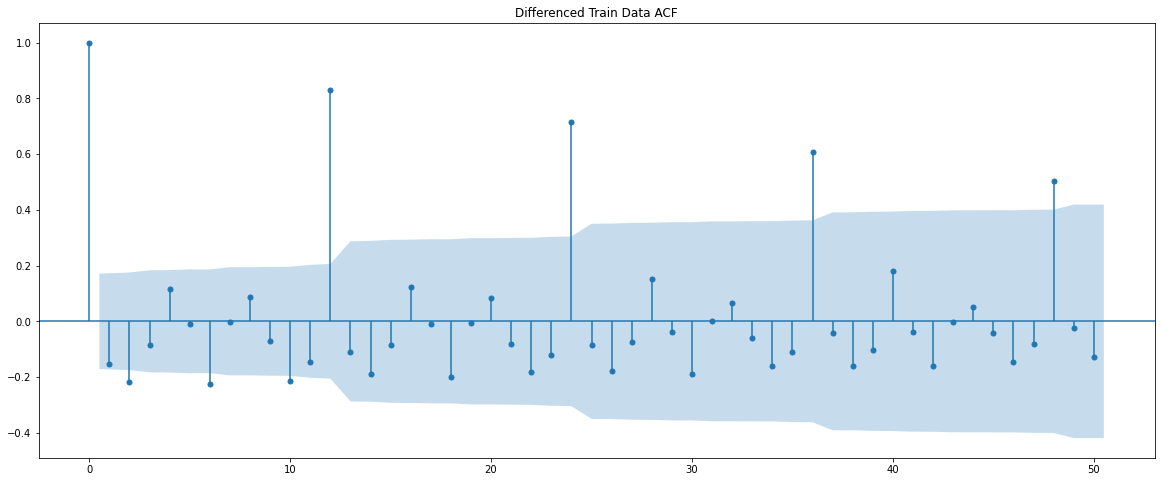

In [745]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Train Data ACF')
plt.show()

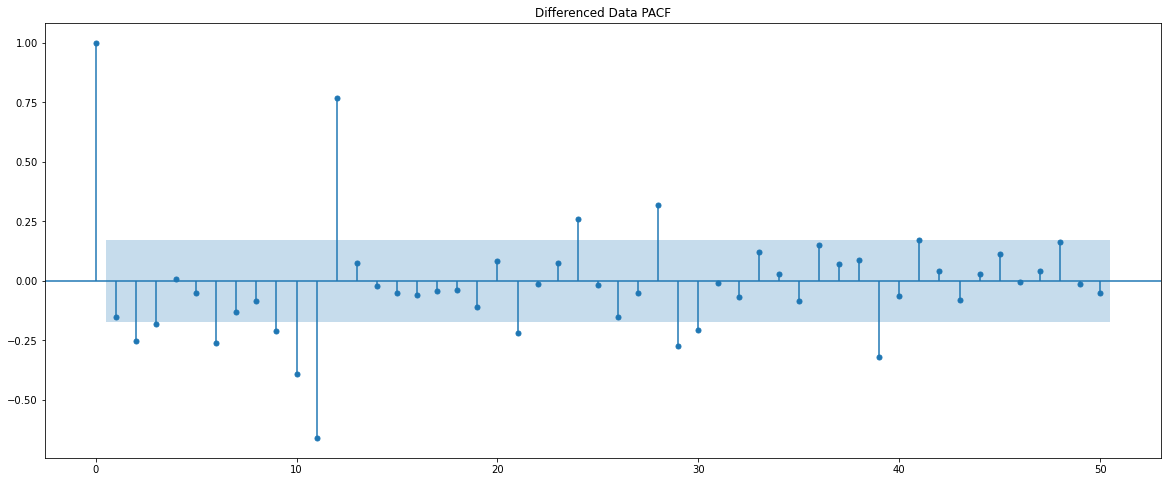

In [746]:
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data PACF')
plt.show()

Seasonality after every 12th lag is visible. We will run our auto SARIMA models by setting seasonality as 12.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [747]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [748]:
SARIMA_AIC1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [749]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model1 = sm.tsa.statespace.SARIMAX(train['Sparkling'].diff().dropna(),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA1 = SARIMA_model1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA1.aic))
        SARIMA_AIC1 = SARIMA_AIC1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2341.775823512853
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2039.5060843083772
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1798.1127884050325
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1922.5472330484467
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1717.2612806471475
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1528.5681091348413
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1938.3760914006027
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1910.8340510241844
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1719.946858750204
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1736.7215154264156
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1717.5890452685273
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1531.576889633617
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1738.6920590288312
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1738.822869751253
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1721.1447288696015
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1544.6504869879823
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1546.7531282468033
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1533.067617635232
SARIMA(0, 1, 1)

SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1782.9102829641988
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1720.1441394965727
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1552.6897043711801
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1579.2096215875872
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1561.1584501733378
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1377.8684841772128
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1571.8324285005217
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1567.3305331005351
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1553.2123460637683
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1392.6574560140707
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.2294376872421
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1379.8435534161852


In [750]:
SARIMA_AIC1.sort_values(by=['AIC']).head()

param       seasonal          AIC
95   (1, 1, 2)  (0, 1, 2, 12)  1375.249142
155  (2, 1, 2)  (1, 1, 2, 12)  1377.868484
107  (1, 1, 2)  (2, 1, 2, 12)  1378.240131
53   (0, 1, 2)  (2, 1, 2, 12)  1378.379011
161  (2, 1, 2)  (2, 1, 2, 12)  1379.843553

In [751]:

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].diff().dropna(),
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  131
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -681.625
Date:                            Sun, 05 Jun 2022   AIC                           1375.249
Time:                                    21:51:30   BIC                           1390.314
Sample:                                02-01-1980   HQIC                          1381.327
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1996      0.139      1.435      0.151      -0.073       0.472
ma.L1         -1.9384      0.067   

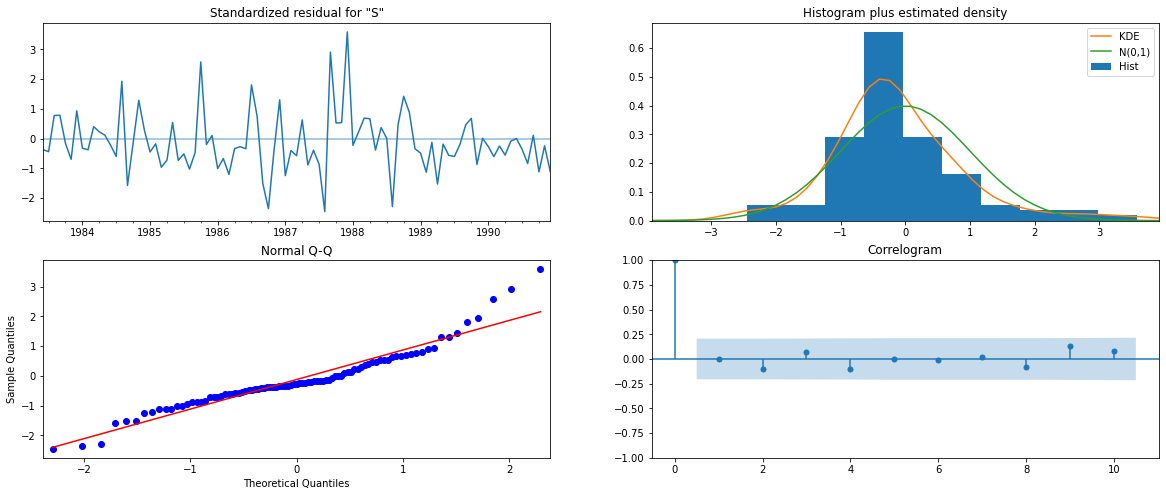

In [752]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [753]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

In [754]:
predicted_auto_SARIMA_12

In [755]:
rmse_autom_SARIMA = round(mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False),2)
print("RMSE of Automated SARIMA model on Test data is:",rmse_autom_SARIMA)

RMSE of Automated SARIMA model on Test data is: 2866.01


In [756]:
resultsDf_auto_SARIMA = pd.DataFrame({'Test RMSE': [rmse_autom_SARIMA]}
                           ,index=['SARIMA Automated (1,1,2)(0,1,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_auto_SARIMA])

resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                           3046.52
3pointTrailingMovingAverage                           2443.00
6pointTrailingMovingAverage                           1521.34
12pointTrailingMovingAverage                          1275.16
ARIMA Automated(1,1,3)                                2763.74
SARIMA Automated (1,1,2)(0,1,2,12)                    2866.01

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.


ACF is used for identifying the valueof q and PACF is used for identifying the value of 𝑝

In [757]:
print('The p value of the Augmented Dickey-Fuller Test on Train data:', round(adfuller(train, autolag='AIC')[1],6))

The p value of the Augmented Dickey-Fuller Test on Train data: 0.669744


The data isnt stationary


In [758]:
print('The p value of the Augmented Dickey-Fuller Test on Train data:',adfuller(train.diff().dropna(), autolag='AIC')[1])

The p value of the Augmented Dickey-Fuller Test on Train data: 2.280104355826159e-12


The data after first difference is stationary. Thus we can consider the value of d as 1.


### Plot for ARIMA - p,d,q

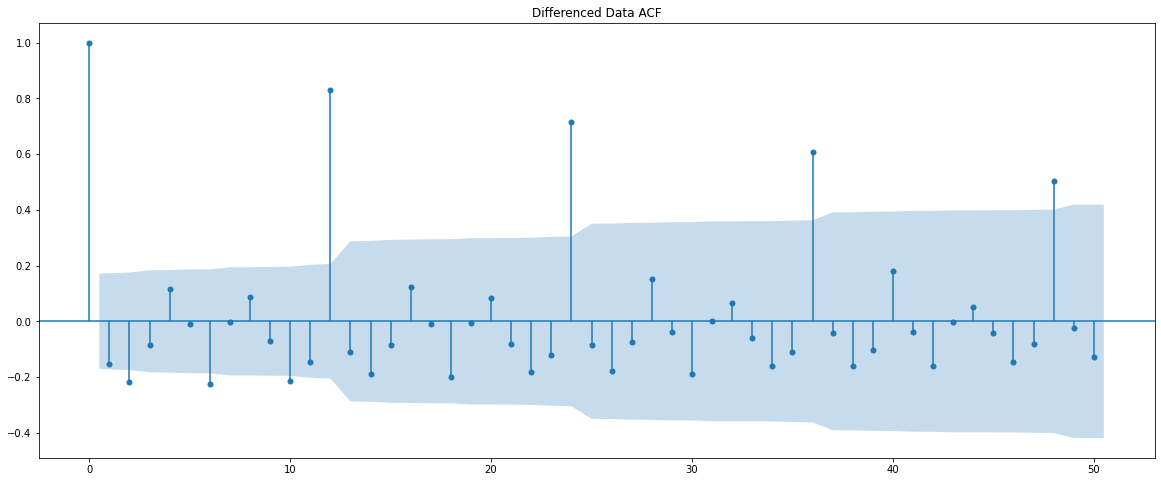

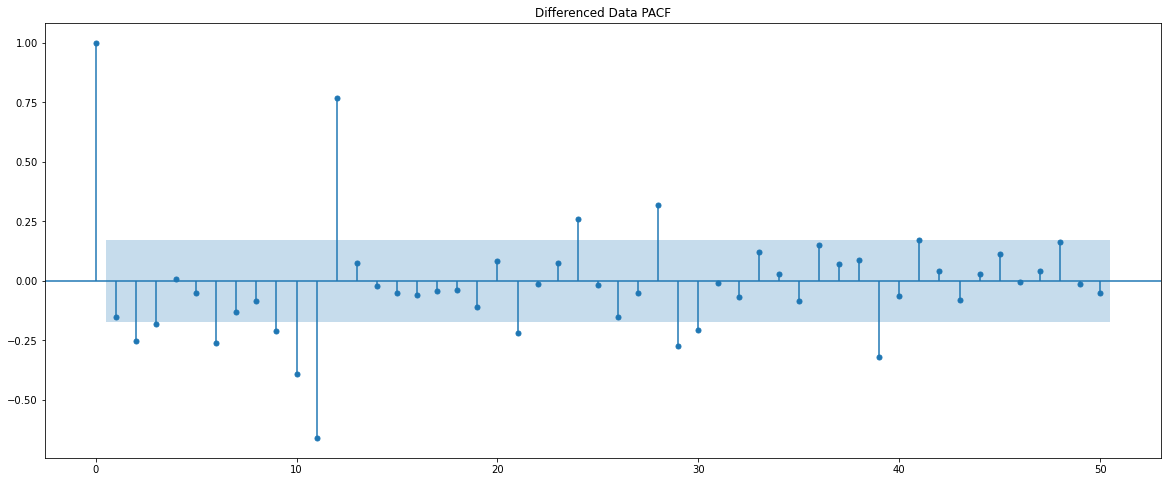

In [759]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data ACF')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data PACF')
plt.show()

After first differencing the ACF plot suggests that there is strong seasonality present which is tailing off. Hence we need to consider a Seasonal First Difference of 12 (as observed in the initial plots) must be used for a proper model.
For building an ARIMA model we cannot consider seasonality, hence we will consider the first difference plots to decide on the AR(p) and MA(q) terms.

From the acf plot it may be observed that there is no signifact lag at lag 1. So MA (q) term may be taken as 0. Hence q is 0.
    
From the pacf plot it may be observed that there is no signifact lag at lag 1. So AR (p) term may be taken as 0. Hence p is 0.
    
ARIMA - From plots we can see that p = 0 and q = 0 with d = 1
    




### ARIMA Model Manual
The (p,d,q) values as observed from above are (0,1,0)

In [760]:
manual_ARIMA = ARIMA(train['Sparkling'].diff().dropna(), order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1178.525
Date:                Sun, 05 Jun 2022   AIC                           2359.049
Time:                        21:51:32   BIC                           2361.917
Sample:                    02-01-1980   HQIC                          2360.215
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.35e+06   3.19e+05     13.642      0.000    3.72e+06    4.97e+06
Ljung-Box (L1) (Q):                  29.52   Jarque-Bera (JB):               101.79
Prob(Q):                              0.00   Pr

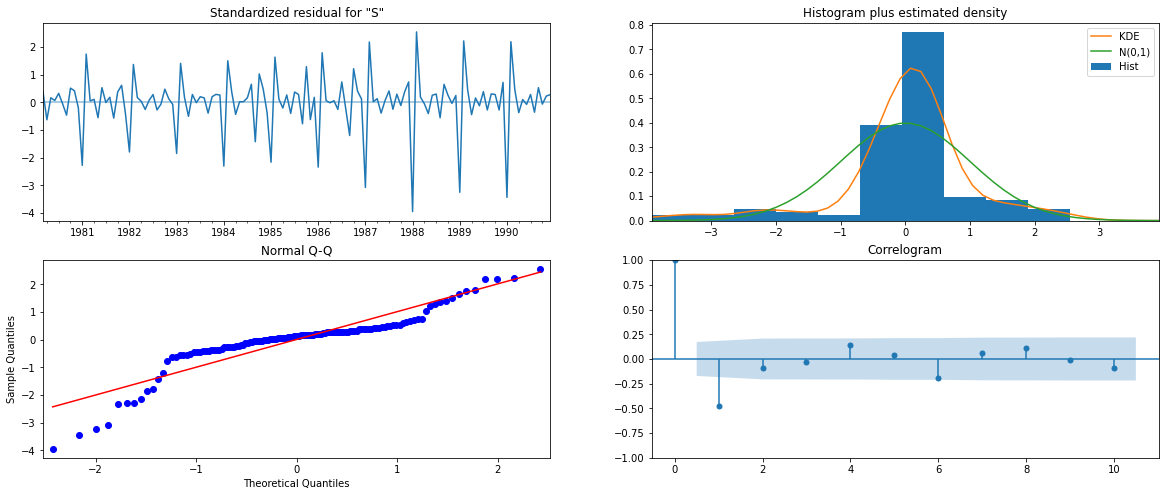

In [761]:
results_manual_ARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [762]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))


In [763]:
rmse_manual_ARIMA = round(metrics.mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False),2)
print("RMSE of Manual ARIMA model on Test data is:",rmse_manual_ARIMA)

RMSE of Manual ARIMA model on Test data is: 1425.85


In [764]:
resultsDf_manual_ARIMA = pd.DataFrame({'Test RMSE': [rmse_manual_ARIMA]}
                           ,index=['ARIMA Manual(0,1,0)'])


resultsDf = pd.concat([resultsDf,resultsDf_manual_ARIMA])

resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                           3046.52
3pointTrailingMovingAverage                           2443.00
6pointTrailingMovingAverage                           1521.34
12pointTrailingMovingAverage                          1275.16
ARIMA Automated(1,1,3)                                2763.74
SARIMA Automated (1,1,2)(0,1,2,12)                    2866.01
ARIMA Manual(0,1,0)                                   1425.85

### Plot for SARIMA-(P,D,Q)

### SARIMA Model Manual

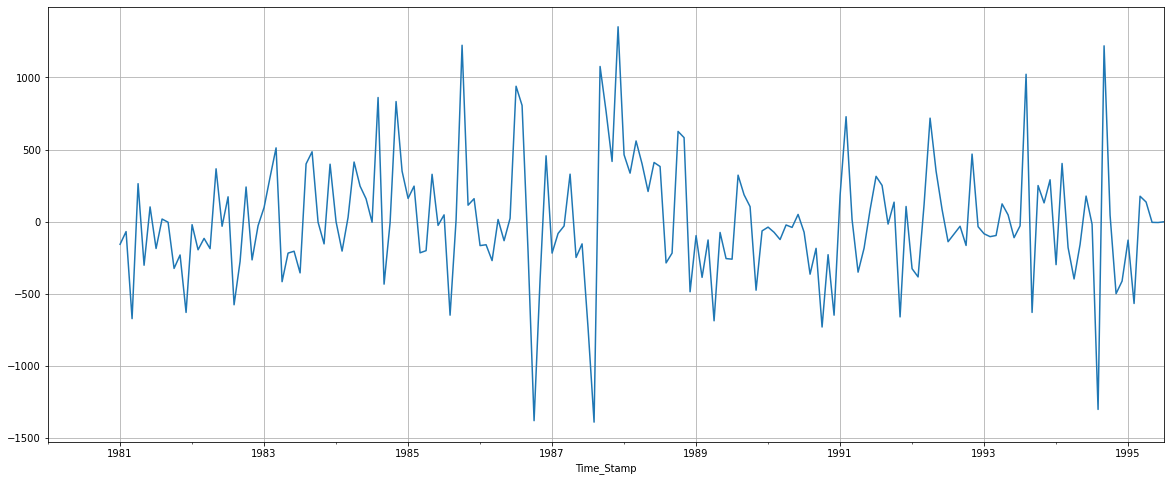

In [765]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

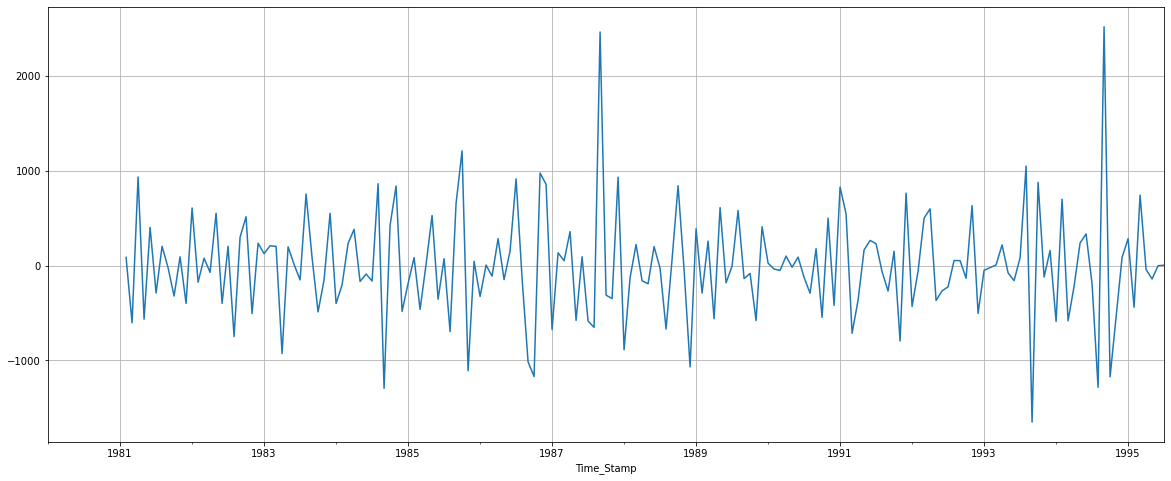

In [766]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

In [767]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



Checking the ACF and the PACF plots for the new modified Time Series.

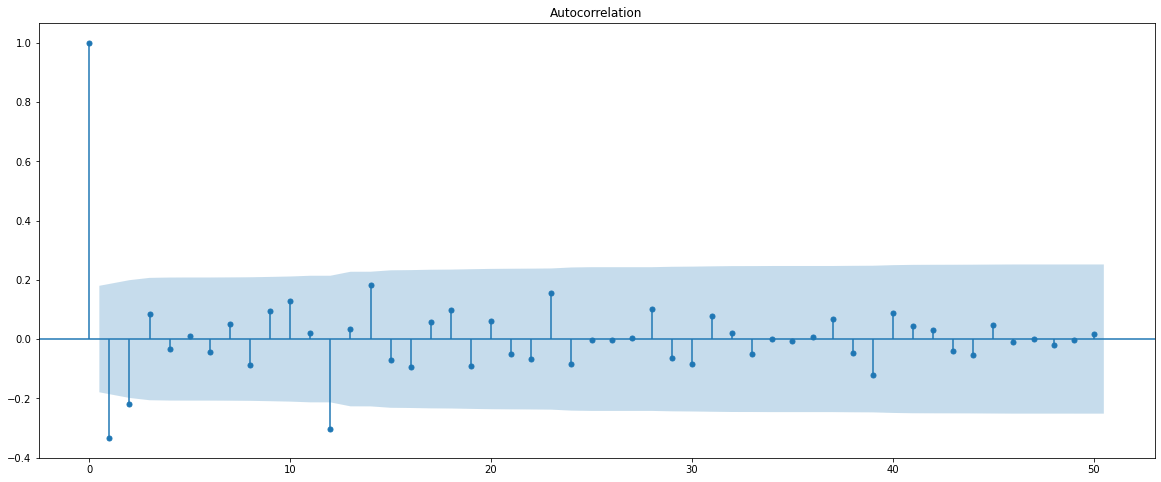

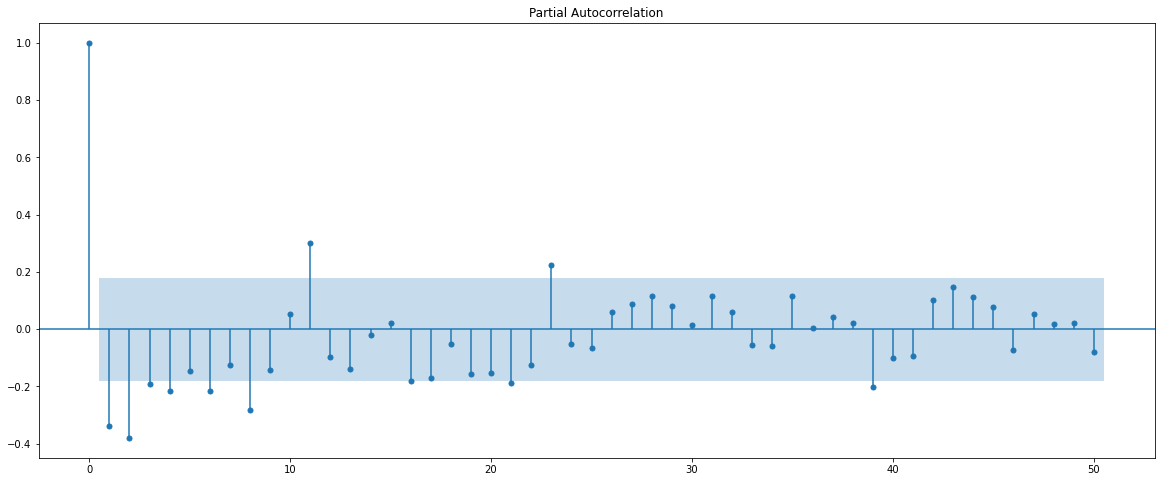

In [768]:
plot_acf((train['Sparkling'].diff(12).dropna()).diff(1).dropna(),alpha=0.05,lags=50)
plot_pacf((train['Sparkling'].diff(12).dropna()).diff(1).dropna(),alpha=0.05,lags=50);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(1) and q(1) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.

By looking at the plots we see that the ACF and the PACF do not directly cut-off to 0.


In [769]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].diff().dropna().values,
                                order=(0, 1, 0),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  131
Model:             SARIMAX(0, 1, 0)x(4, 1, [1, 2], 12)   Log Likelihood                -573.025
Date:                                 Sun, 05 Jun 2022   AIC                           1160.050
Time:                                         21:51:35   BIC                           1175.790
Sample:                                              0   HQIC                          1166.302
                                                 - 131                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3749      0.462     -0.811      0.417      -1.281       0

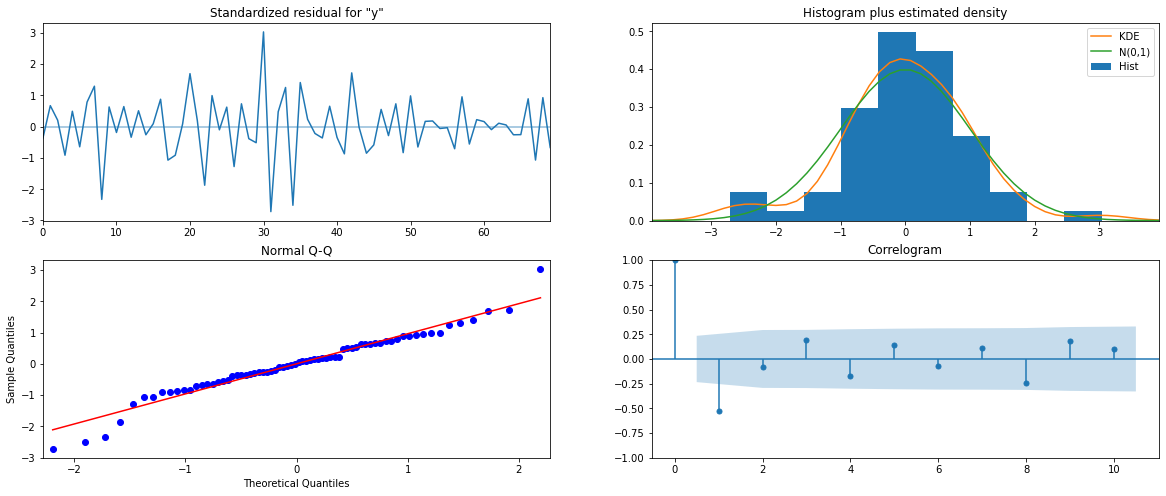

In [770]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

The model diagnostics plot looks okay.

## Predict on the Test Set using this model and evaluate the model.

In [771]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [772]:
rmse_manual_SARIMA = round(metrics.mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False),2)
print("RMSE of Manual SARIMA model on Test data is:",rmse_manual_SARIMA)

RMSE of Manual SARIMA model on Test data is: 3437.38


In [773]:
resultsDf_manual_SARIMA = pd.DataFrame({'Test RMSE': [rmse_manual_SARIMA]}
                           ,index=['SARIMA Manual(0,1,0)(4,1,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_manual_SARIMA])

resultsDf

Test RMSE
Alpha=0.07,SES                                        1338.01
Alpha=0.66,Beta=0.0001:DES                            5291.88
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
Alpha=0.1 SES Iterative                               1375.39
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
RegressionOnTime                                      1389.14
NaiveModel                                            3864.28
SimpleAverageModel                                    1275.08
2pointTrailingMovingAverage                           3046.52
3pointTrailingMovingAverage                           2443.00
6pointTrailingMovingAverage                           1521.34
12pointTrailingMovingAverage                          1275.16
ARIMA Automated(1,1,3)                                2763.74
SARIMA Automated (1,1,2)(0,1,2,12)                    2866.01
ARIMA Manual(0,1,0)                                   1425.85
SARIMA Manual(0,1,0)(4,1,2,12)                        3437.38

This is where our model building exercise ends. 

Now, we will take our best model and forecast 12 months into the future with appropriate confidence intervals to see how the predictions look. We have to build our model on the full data for this.

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [774]:
resultsDf.sort_values(by=['Test RMSE'])


Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TES Iterative Mult...     317.43
Alpha=0.1,Beta=0.4,Gamma=0.1,TES Iterative Addi...     342.93
Alpha=0.11,Beta=0.01,Gamma=0.46:TES additive           378.95
Alpha=0.11,Beta=0.049,Gamma=0.36:TES Multiplica...     404.29
SimpleAverageModel                                    1275.08
12pointTrailingMovingAverage                          1275.16
Alpha=0.07,SES                                        1338.01
Alpha=0.1 SES Iterative                               1375.39
RegressionOnTime                                      1389.14
ARIMA Manual(0,1,0)                                   1425.85
6pointTrailingMovingAverage                           1521.34
Alpha=0.1 , Beta=0.1,DES Iterative                    1777.73
3pointTrailingMovingAverage                           2443.00
ARIMA Automated(1,1,3)                                2763.74
SARIMA Automated (1,1,2)(0,1,2,12)                    2866.01
2pointTrailingMovingAverage                           3046.52
SARIMA Manual(0,1,0)(4,1,2,12)                        3437.38
NaiveModel                                            3864.28
Alpha=0.66,Beta=0.0001:DES                            5291.88

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


In [775]:
model_TES_m_final = ExponentialSmoothing(df,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_m_final = model_TES_m_final.fit(smoothing_level=0.4,smoothing_trend=0.1,smoothing_seasonal=0.2,optimized=False,use_brute=True)
print(model_TES_m_final.params)


{'smoothing_level': 0.4, 'smoothing_trend': 0.1, 'smoothing_seasonal': 0.2, 'damping_trend': nan, 'initial_level': 2356.541666666665, 'initial_trend': -9.181060606060463, 'initial_seasons': array([0.71166877, 0.67309316, 0.81943184, 0.78429538, 0.63424785,
       0.63175794, 0.82647725, 1.0318111 , 0.89263071, 1.1231428 ,
       1.69872589, 2.17271729]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [776]:
TES_m_predict_final =  model_TES_m_final.forecast(12)
TES_m_predict_final

1995-08-01    2088.425429
1995-09-01    2614.039802
1995-10-01    3457.976195
1995-11-01    4330.695877
1995-12-01    6595.144301
1996-01-01    1550.768494
1996-02-01    1832.282175
1996-03-01    2074.922505
1996-04-01    2002.415693
1996-05-01    1821.629000
1996-06-01    1708.486723
1996-07-01    2190.179438
Freq: MS, dtype: float64

In [777]:
pred_1_df_ci = pd.DataFrame({'lower_CI':TES_m_predict_final - 1.96*np.std(model_TES_m_final.resid,ddof=1),
                          'prediction':TES_m_predict_final,
                          'upper_ci': TES_m_predict_final + 1.96*np.std(model_TES_m_final.resid,ddof=1)})
pred_1_df_ci.head()

lower_CI   prediction     upper_ci
1995-08-01  1329.842420  2088.425429  2847.008439
1995-09-01  1855.456792  2614.039802  3372.622811
1995-10-01  2699.393185  3457.976195  4216.559204
1995-11-01  3572.112868  4330.695877  5089.278887
1995-12-01  5836.561291  6595.144301  7353.727310

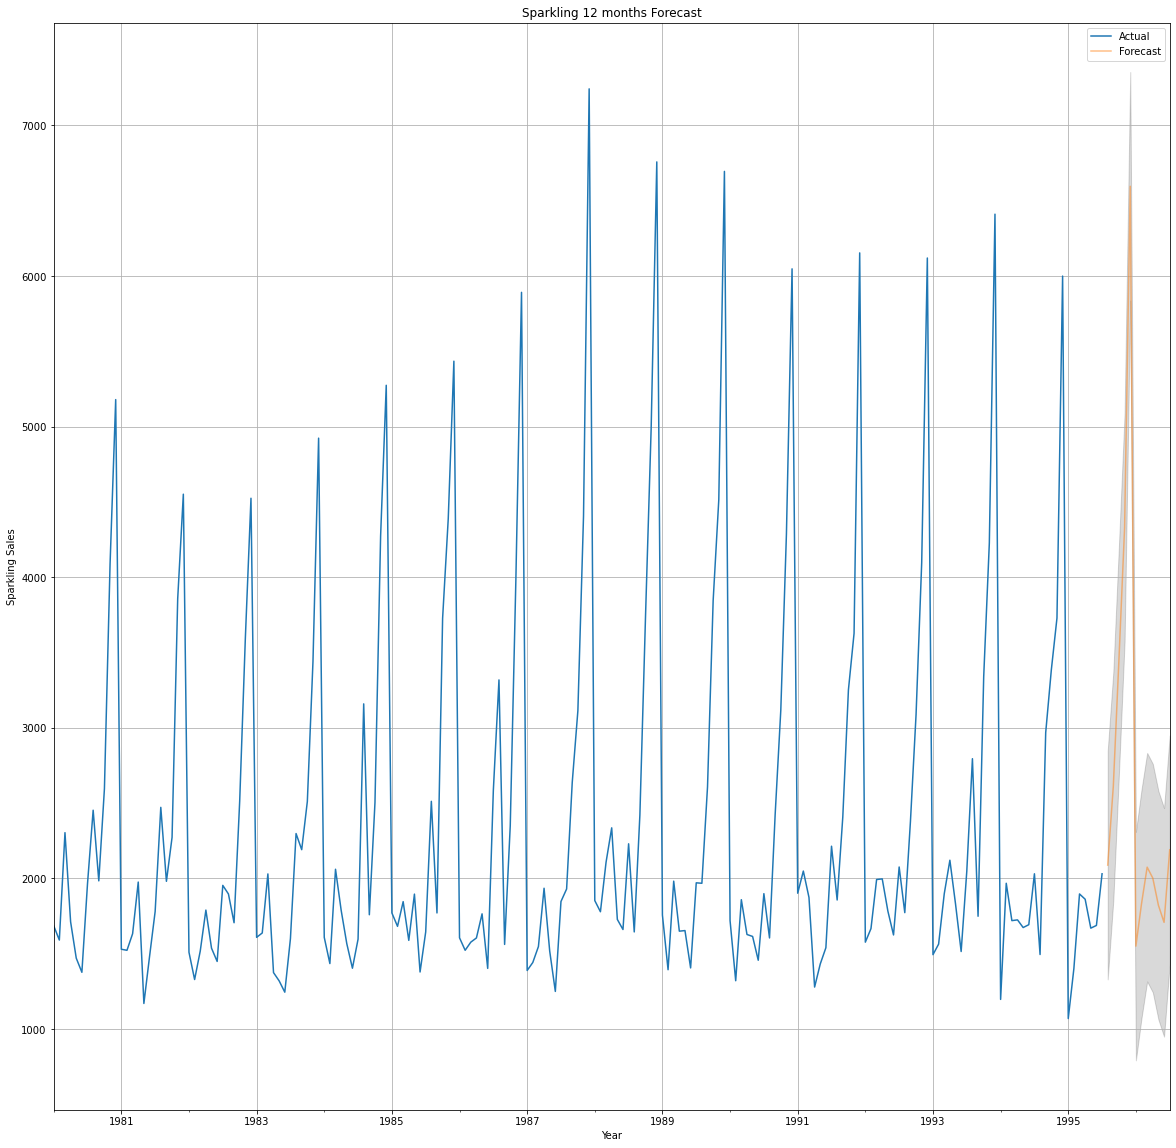

In [778]:
axis = df['Sparkling'].plot(label='Actual', figsize=(20,20))
TES_m_predict_final.plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(TES_m_predict_final.index, pred_1_df_ci['lower_CI'], pred_1_df_ci['upper_ci'], color='k', alpha=.15)
plt.title('Sparkling 12 months Forecast')

axis.set_xlabel('Year')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.


1. First  read the data as a time series and plotted it on a graph to show how sales for Sparkling wines over the years. 

2. Then performed some exploratory data analyses on the data sets, creating various types of charts for analyze the sales.

3. I split the data into test(data after the year 1991) and train(data before the year 1991).

4. Next I built the following  models :
• Simple Exponential Smoothing Model 
• Iterative Simple Exponential Smoothing Model 
• Double Exponential Smoothing Model
• Iterative Double Exponential Smoothing Model
• Triple Exponential Smoothing Model
• Iterative Triple Exponential Smoothing Model.
• Linear Regression Model 
• Naïve Approach 
• Simple Average Model 
• Moving Average Model
For all the above models RMSE value was calculated to understand the performance.

5. The stationarity of the data was checked by stating hypothesis for statistical testing and using ADF Test.

6. From here, we build ARIMA and SARIMA models, but first we examine the dataset. If the series is not stationary, we take the first difference of the series and converted into a stationary series.

7. The ARIMA/SARIMA models are built using AIC scores, we select the parameter with the least AIC and the model is built with it. RMSE is also calculated to check the performance.

8. The ARIMA/SARIMA models are built manually by calculating value of p,q,P,Q,s,d,D from ACF , PACF graph. RMSE is also calculated to check the performance.

9. Finally, we take the model with minimum RMSE value and build the most optimum model on the complete data .The sales for the next 12 months in future with 95% confidence intervals is predicted.

### Recommendations



--> Fourth quarter has the highes sales among other quarter. So the company can stock up the wines in the second quarter itself to prepare themselves to supply the high demand in the fourth quarter.

--> Proper branding advertising in leading newspaper and magazines can be done. Social Media Advertising can also be done to improve the sales in the first 3 quarters.

--> Second quarter has the lowest sales . So coupons and differs can be offered to boost up the sales.

--> The quality and the taste of the wines can be improved.

--> Further information like age group,location of the customers can be analyzed to improve the model performance and get a better understanding of the Sparkling wine sales.